# Core plotting functions
Dataset from 10x containing 68k cells from PBMC. This dataset has been already preprocessed and UMAP computed

literature markers: 
<br>
- __B-cell__: CD79A, MS4A1 
<br>
- __Plasma__: IGJ (JCHAIN) 
<br>
- __T-cell__: CD3D 
<br>
- __NK__: GNLY, NKG7 
<br>
- __Myeloid__: CST3, LYZ 
<br>
- __Monocytes__: FCGR3A 
<br>
- __Dendritic__: FCER1A

## Scatter plots for embeddings

Scatter plots for tSNE, UMAP, and other embeddings are available with `sc.pl.tsne`, `sc.pl.umap`, etc functions.

In [20]:
import scanpy as sc 
import pandas as pd
from matplotlib.pyplot import rc_context
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [21]:
sc.set_figure_params(dpi=100, color_map='viridis_r')
sc.settings.verbosity = 1
sc.logging.print_header()

scanpy==1.9.6 anndata==0.10.3 umap==0.5.5 numpy==1.26.2 scipy==1.11.4 pandas==2.1.3 scikit-learn==1.3.2 statsmodels==0.14.0 igraph==0.11.3 pynndescent==0.5.11


### Load pbmc dataset

In [22]:
pbmc = sc.datasets.pbmc68k_reduced()

In [23]:
# inspect pbmc contents 
pbmc

AnnData object with n_obs × n_vars = 700 × 765
    obs: 'bulk_labels', 'n_genes', 'percent_mito', 'n_counts', 'S_score', 'G2M_score', 'phase', 'louvain'
    var: 'n_counts', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'bulk_labels_colors', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

### Visualization of gene expression and other variables

For scatter plots, the value to plot is given as the `color` argument

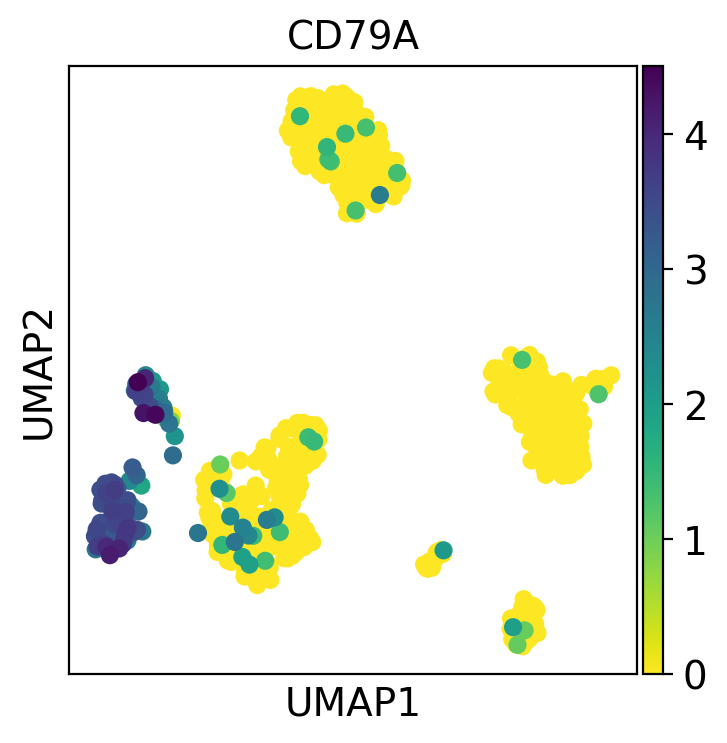

In [24]:
# rc_context is used for the figure size, in this case 4x4
with rc_context({'figure.figsize': (4,4)}):
    sc.pl.umap(pbmc, color='CD79A')

Multiple values can be given to `color`. Plot with `n_counts` (number of UMI counts per cell), and `bulk_labels` (categorical value containing the original labeling of the cells from 10X).

`ncols` is number of plots per row, `vmax` is max value plotted, `frameon=False` removes the boxes around the plots, and `s=50` sets the dot size.

/home/mesqueda/miniconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


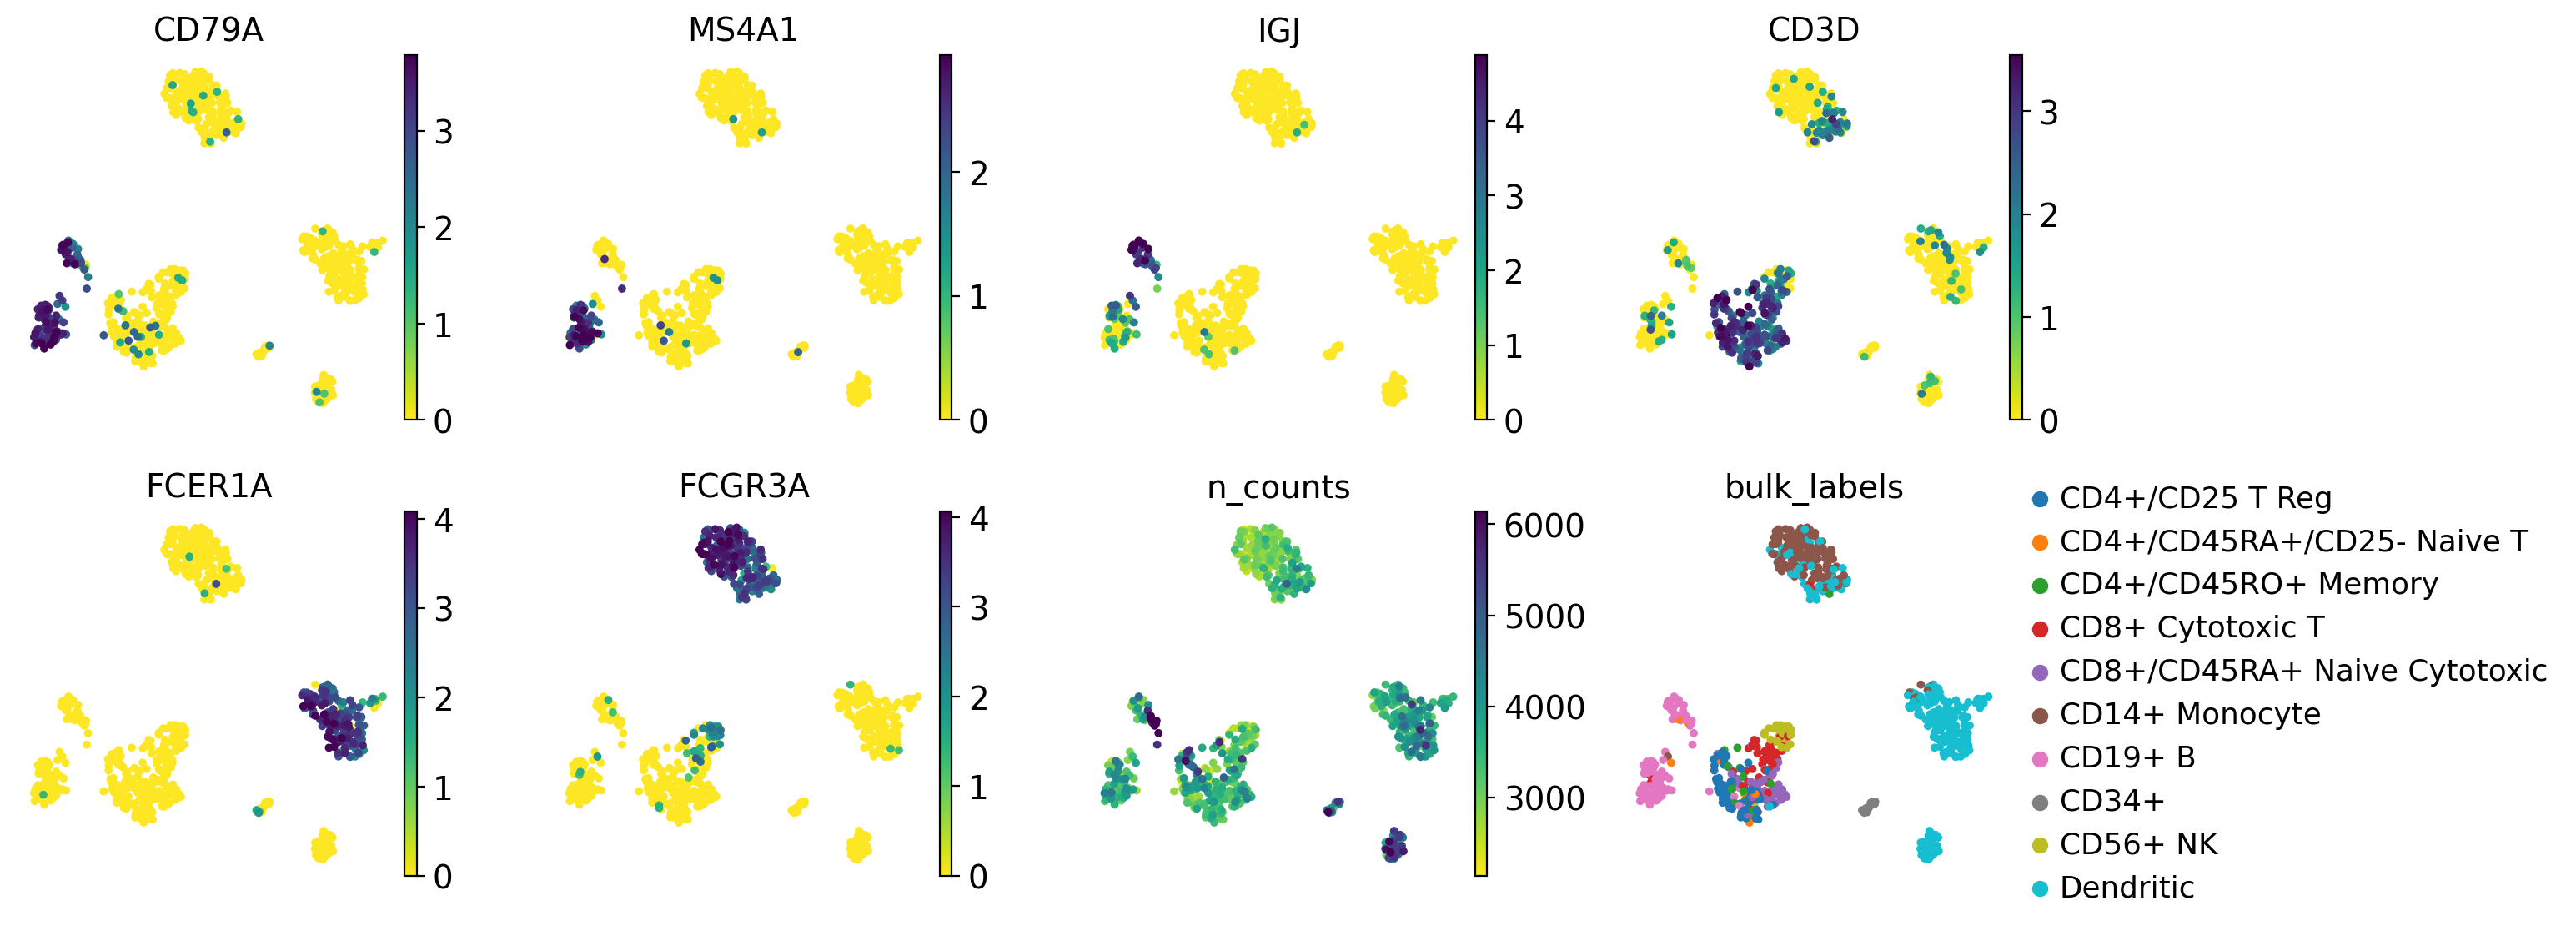

In [25]:
with rc_context({'figure.figsize': (3,3)}):
    sc.pl.umap(pbmc, color=['CD79A', 'MS4A1', 'IGJ', 'CD3D', 'FCER1A', 'FCGR3A', 'n_counts', 'bulk_labels'], 
               s=50, frameon=False, ncols=4, vmax='p99')

Groups of cells that express the marker genes and agreement with the original cells.

Functions for scatterplots have many options to fine tune the images.

In [26]:
# compute clusters using the leiden method and store the results with the name 'clusters'
sc.tl.leiden(pbmc, key_added='clusters', resolution=0.5)

/home/mesqueda/miniconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:371: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/home/mesqueda/miniconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:381: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/home/mesqueda/miniconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


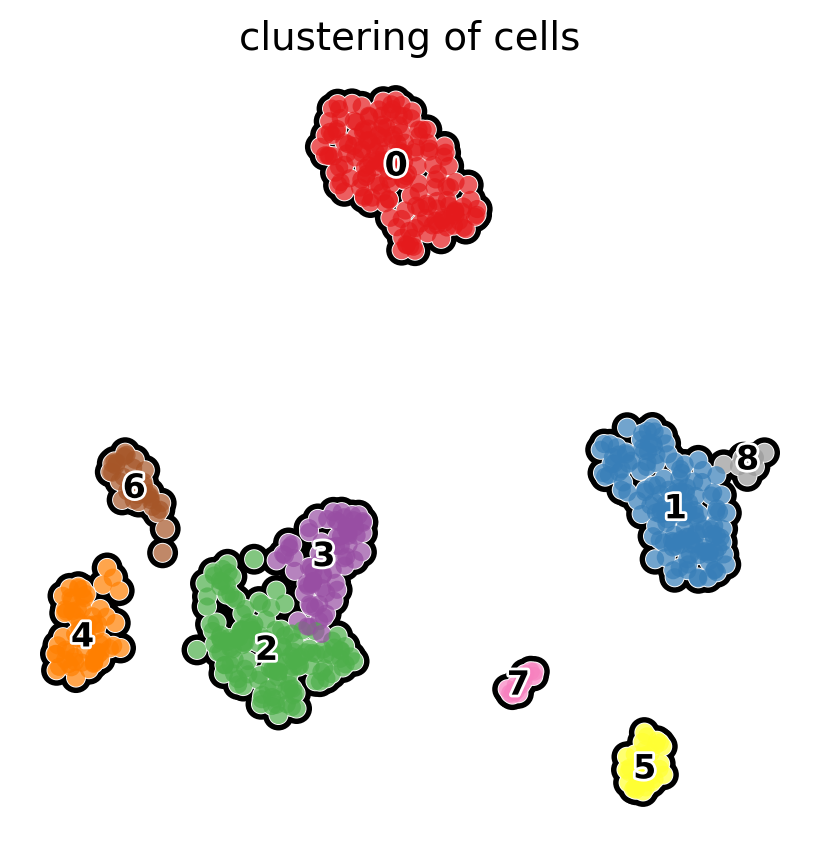

In [27]:
with rc_context({'figure.figsize': (5,5)}):
       sc.pl.umap(pbmc, color='clusters', add_outline=True, legend_loc='on data', 
               legend_fontsize=12, legend_fontoutline=2,frameon=False,  
               title='clustering of cells', palette='Set1')

## Identification of clusters based on known marker genes

Othher visual was to associate marker genes to clusters using _dotplots, violin_plots, heatmaps, and 'tracksplot'_. Each visualization summarize expression by cluster. 

In [28]:
# set up dict with marker genes for labeling the groups of genes
marker_genes_dict = {
    'B-cell': ['CD79A', 'MS4A1'],     
    'Dendritic': ['FCER1A', 'CST3'],    
    'Monocytes': ['FCGR3A'],
    'NK': ['GNLY', 'NKG7'],
    'Other': ['IGLL1'],
    'Plasma': ['IGJ'],
    'T-cell': ['CD3D'],
}

### dotplot

Color represents mean expression within each cluster and the dot size indicates the fraction of the cells in the categories expressing a gene.

Add dendrogram to bring together similar clusters. Heirarchical clustering is computed automatically using the correlation of PCA components between the clusters.

categories: 0, 1, 2, etc.
var_group_labels: B-cell, Dendritic, Monocytes, etc.


/home/mesqueda/miniconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


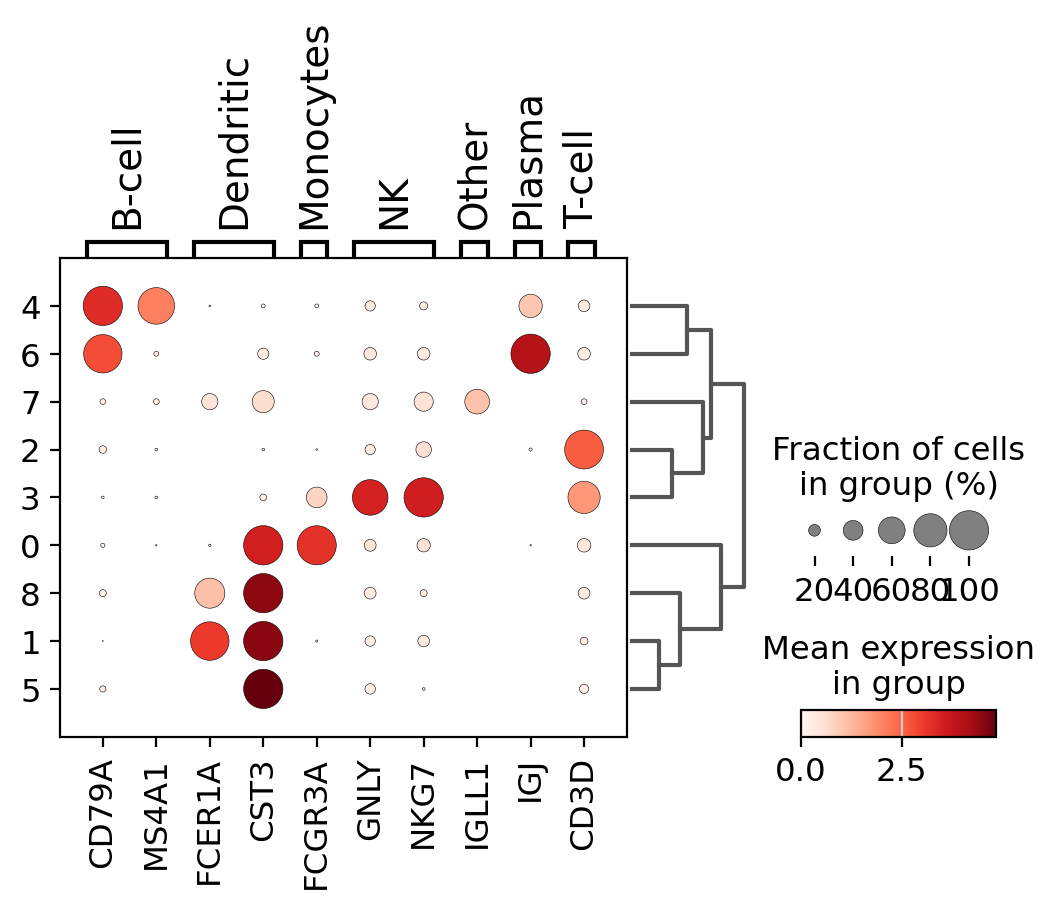

In [29]:
sc.pl.dotplot(pbmc, marker_genes_dict, 'clusters', dendrogram=True)

Cluster 4 corresponds to B-cells, cluster 2 is T-cells etc. This info can be used to manually annotate the cells.

In [30]:
# create a dictionary to map cluster to annotation label
cluster2annotation = {
     '0': 'Monocytes',
     '1': 'Dendritic',
     '2': 'T-cell',
     '3': 'NK',
     '4': 'B-cell',
     '5': 'Dendritic',
     '6': 'Plasma',
     '7': 'Other',
     '8': 'Dendritic',
}

# add a new `.obs` column called `cell type` by mapping clusters to annotation using pandas `map` function
pbmc.obs['cell type'] = pbmc.obs['clusters'].map(cluster2annotation).astype('category')

/home/mesqueda/miniconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


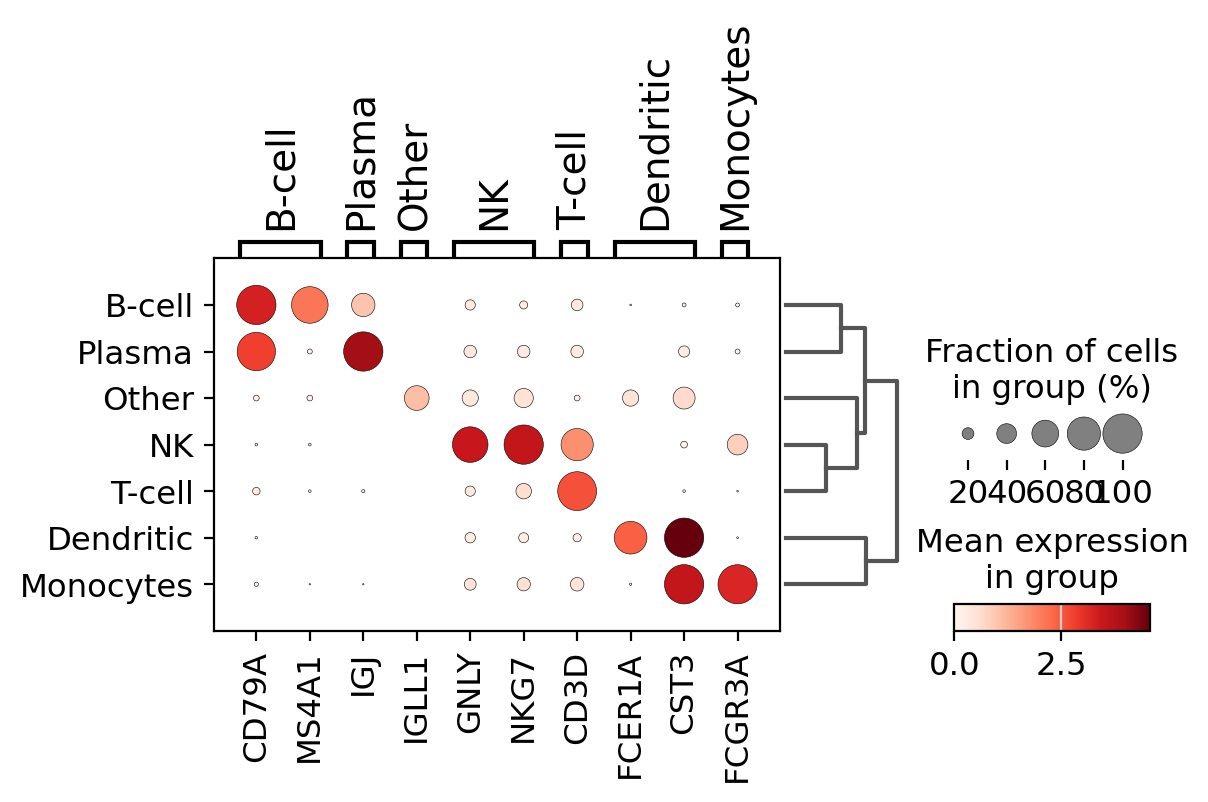

In [31]:
sc.pl.dotplot(pbmc, marker_genes_dict, 'cell type', dendrogram=True)

/home/mesqueda/miniconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


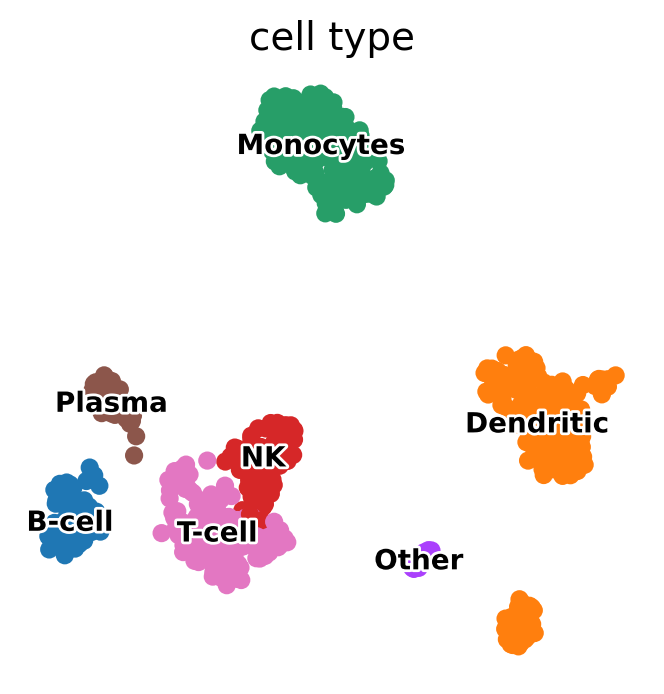

In [32]:
sc.pl.umap(pbmc, color='cell type', legend_loc='on data',
           frameon=False, legend_fontsize=10, legend_fontoutline=2)

### violin plot

The violin plot gives an idea of the distribution of gene expression values across cells.

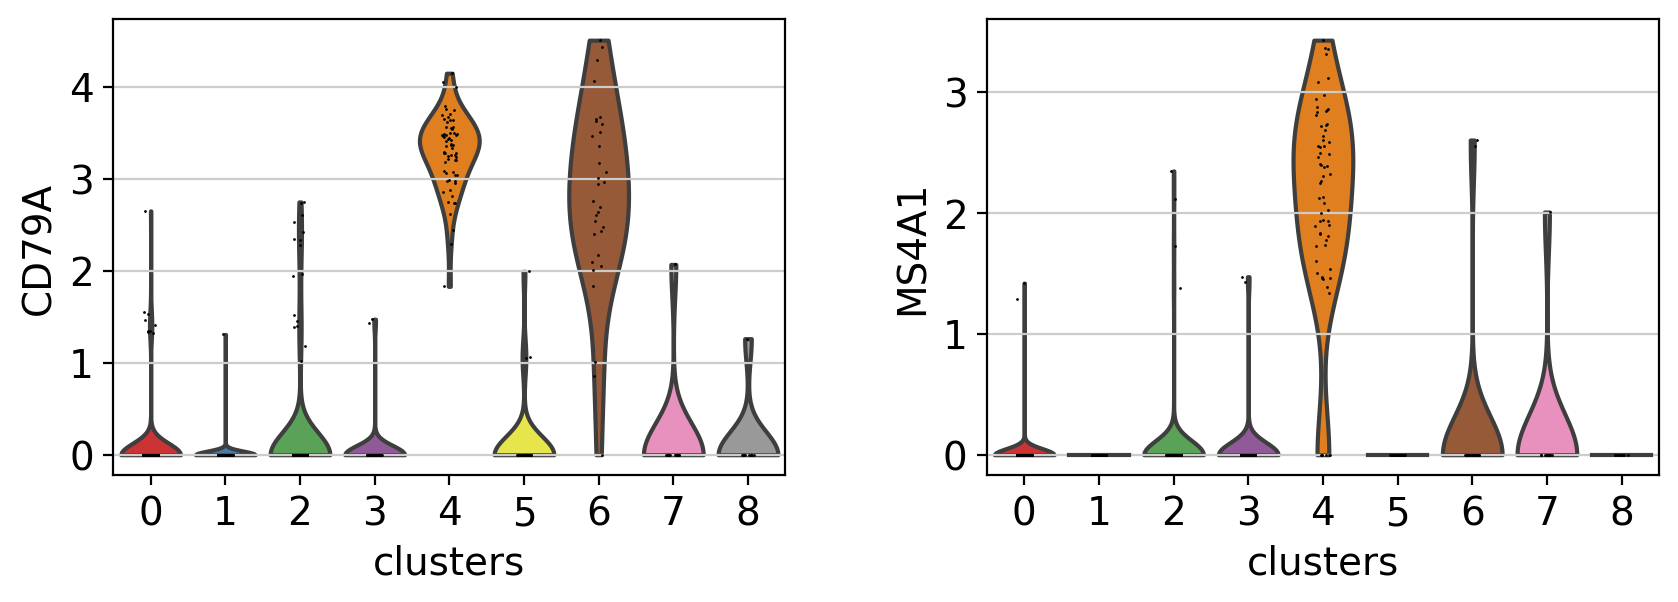

In [33]:
with rc_context({'figure.figsize':(4.5, 3)}):
    sc.pl.violin(pbmc, ['CD79A', 'MS4A1'], groupby='clusters')

Here, violin plots are used to compare the number of genes and the percentage of mitochondrial genes between the different clusters. stripplot=False to remove the internal dots, inner='box' adds a boxplot inside violins.

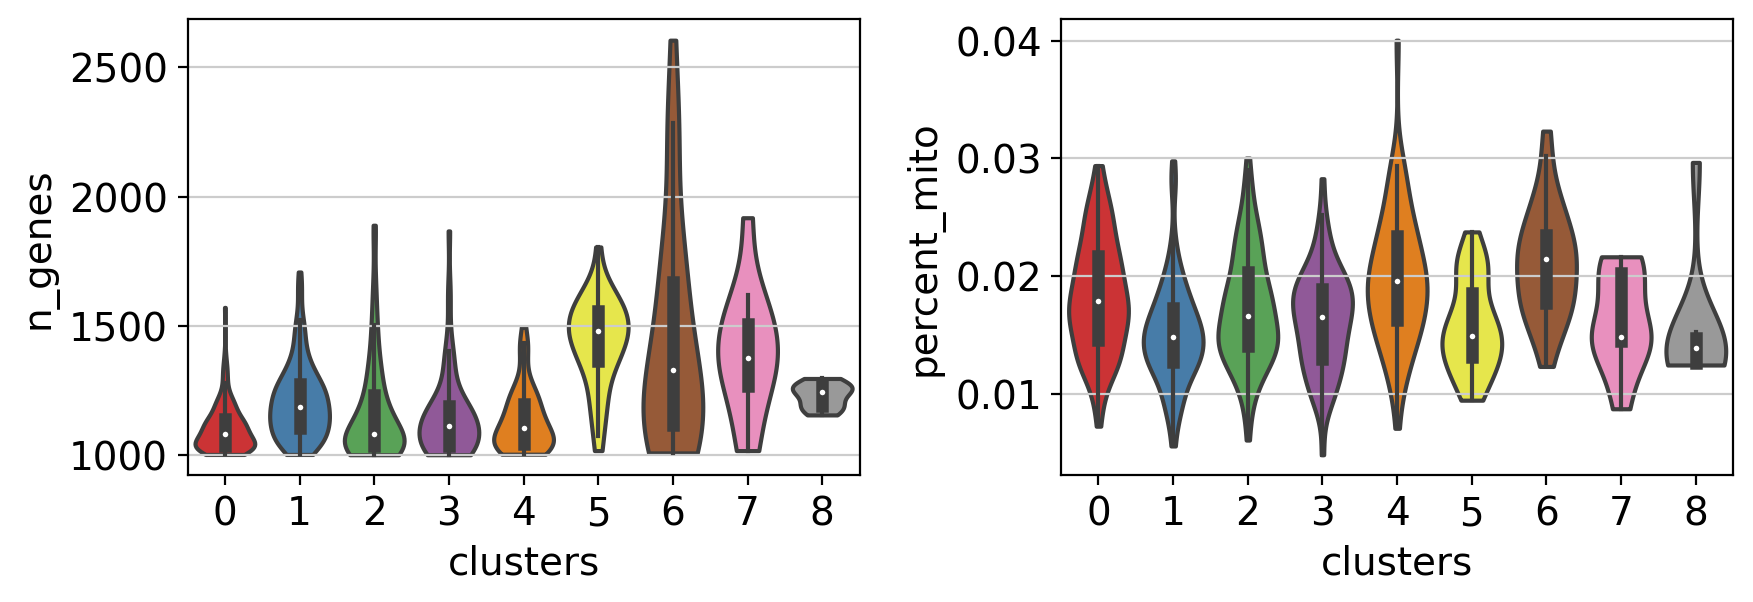

In [34]:
with rc_context({'figure.figsize': (4.5, 3)}):
    sc.pl.violin(pbmc, ['n_genes', 'percent_mito'], groupby='clusters', stripplot=False, inner='box')

### stacked-violin plots

Simultaneously look at the violin plots for all marker genes with `sc.pl.stacked_violin`.

categories: 0, 1, 2, etc.
var_group_labels: B-cell, Dendritic, Monocytes, etc.


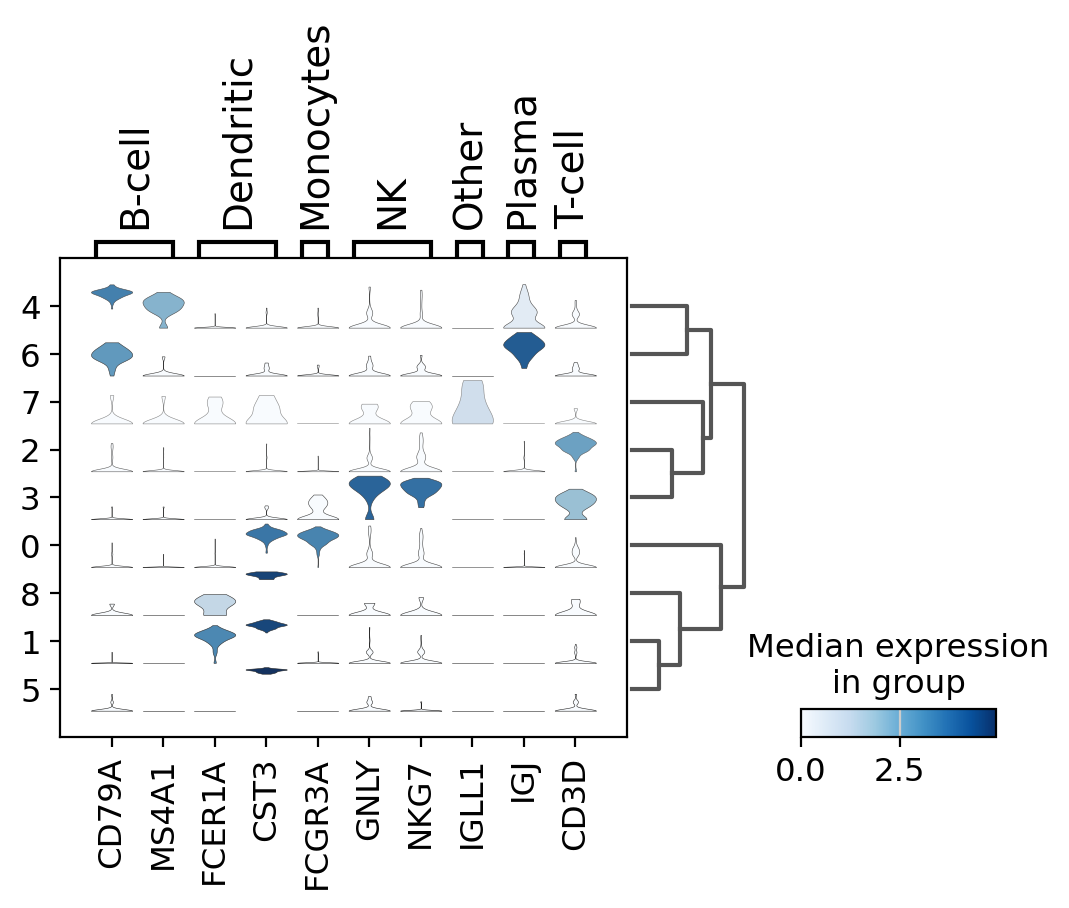

In [35]:
ax = sc.pl.stacked_violin(pbmc, marker_genes_dict, groupby='clusters', swap_axes=False, dendrogram=True)

### matrixplot

`matrix plot` is a heatmap of the mean expression values per gene grouped by categories. Here, the expression of genes is scaled from 0 to 1.

categories: 0, 1, 2, etc.
var_group_labels: B-cell, Dendritic, Monocytes, etc.


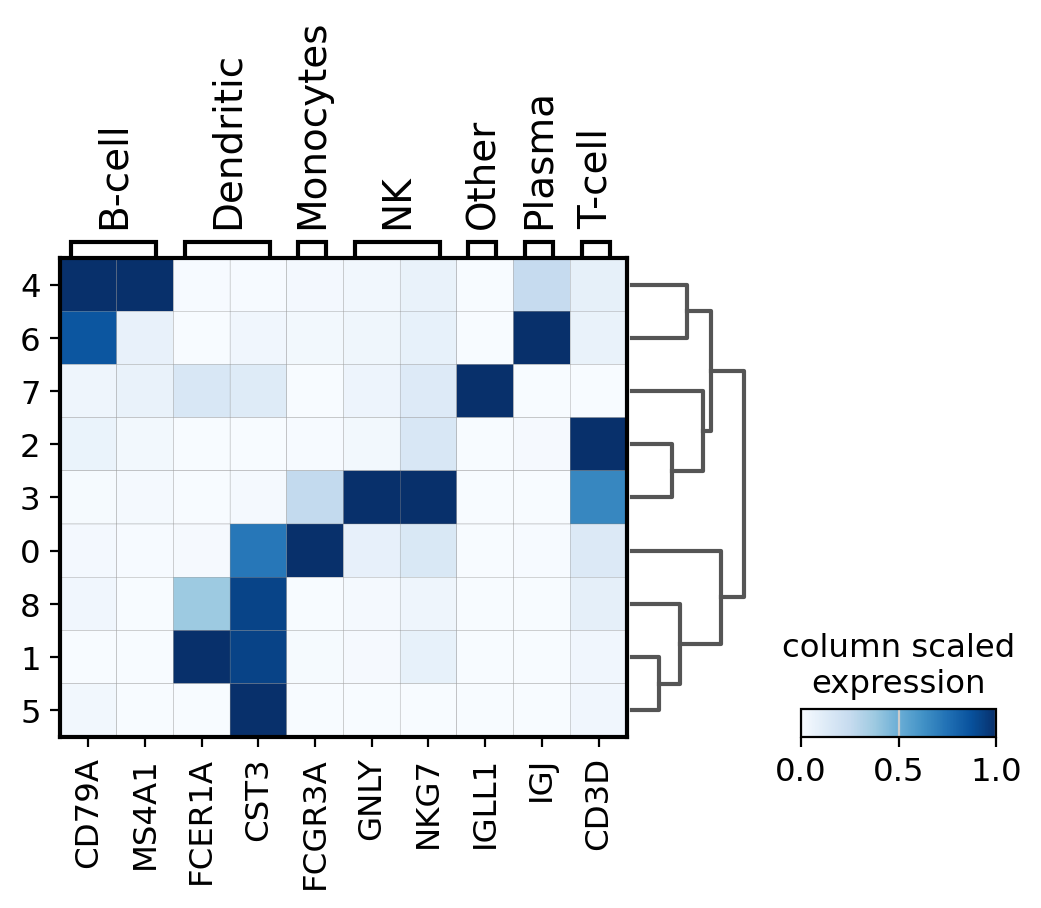

In [36]:
sc.pl.matrixplot(pbmc, marker_genes_dict, 'clusters', dendrogram=True, cmap='Blues', standard_scale='var', colorbar_title='column scaled\nexpression')

Normalize the gene expression using `sc.pp.scale`. Use the info stored under the `scale` layer, adjust the plot min and max and use a diverging color map (`RdBu_r`, `_r` means reversed). 

In [37]:
# scale and store results in layer
pbmc.layers['scaled'] = sc.pp.scale(pbmc, copy=True).X

categories: 0, 1, 2, etc.
var_group_labels: B-cell, Dendritic, Monocytes, etc.


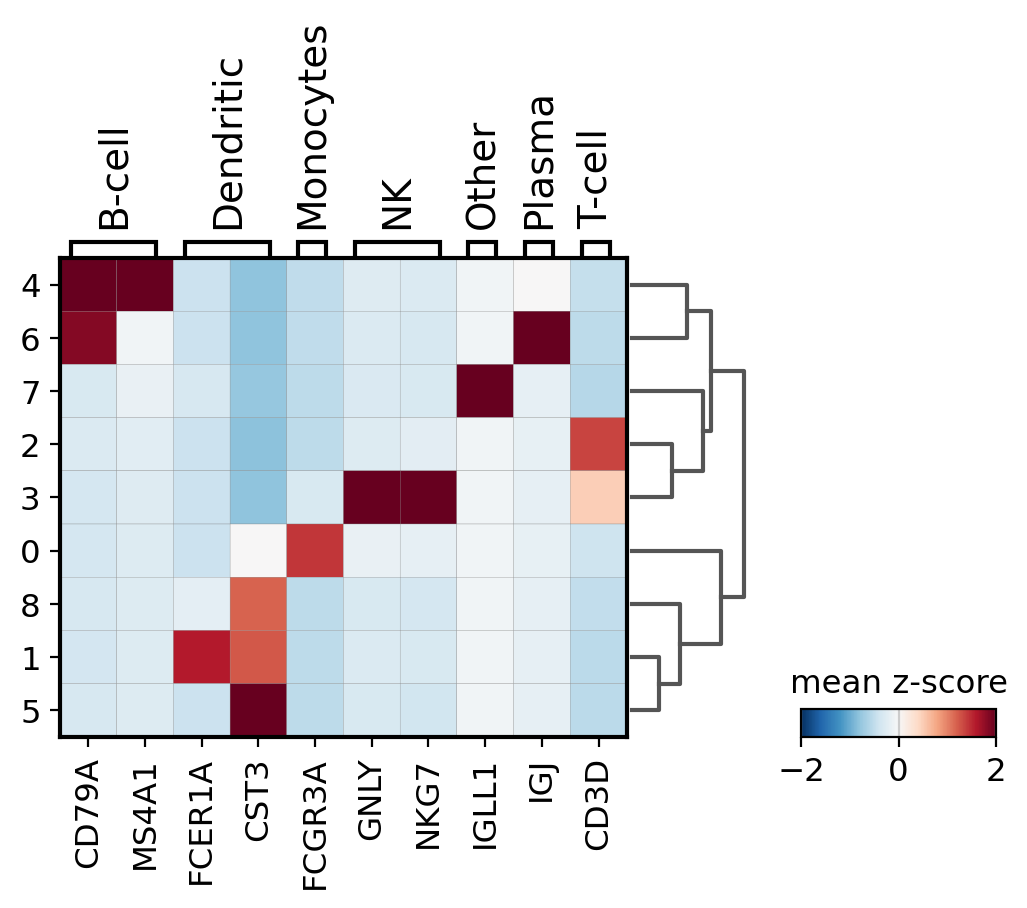

In [38]:
sc.pl.matrixplot(pbmc, marker_genes_dict, 'clusters', dendrogram=True, 
                 colorbar_title='mean z-score', layer='scaled', vmin=-2, vmax=2, cmap='RdBu_r')

## Combining plots in subplots

An `axis` can be passed to a plot to combine multiple outputs

/home/mesqueda/miniconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


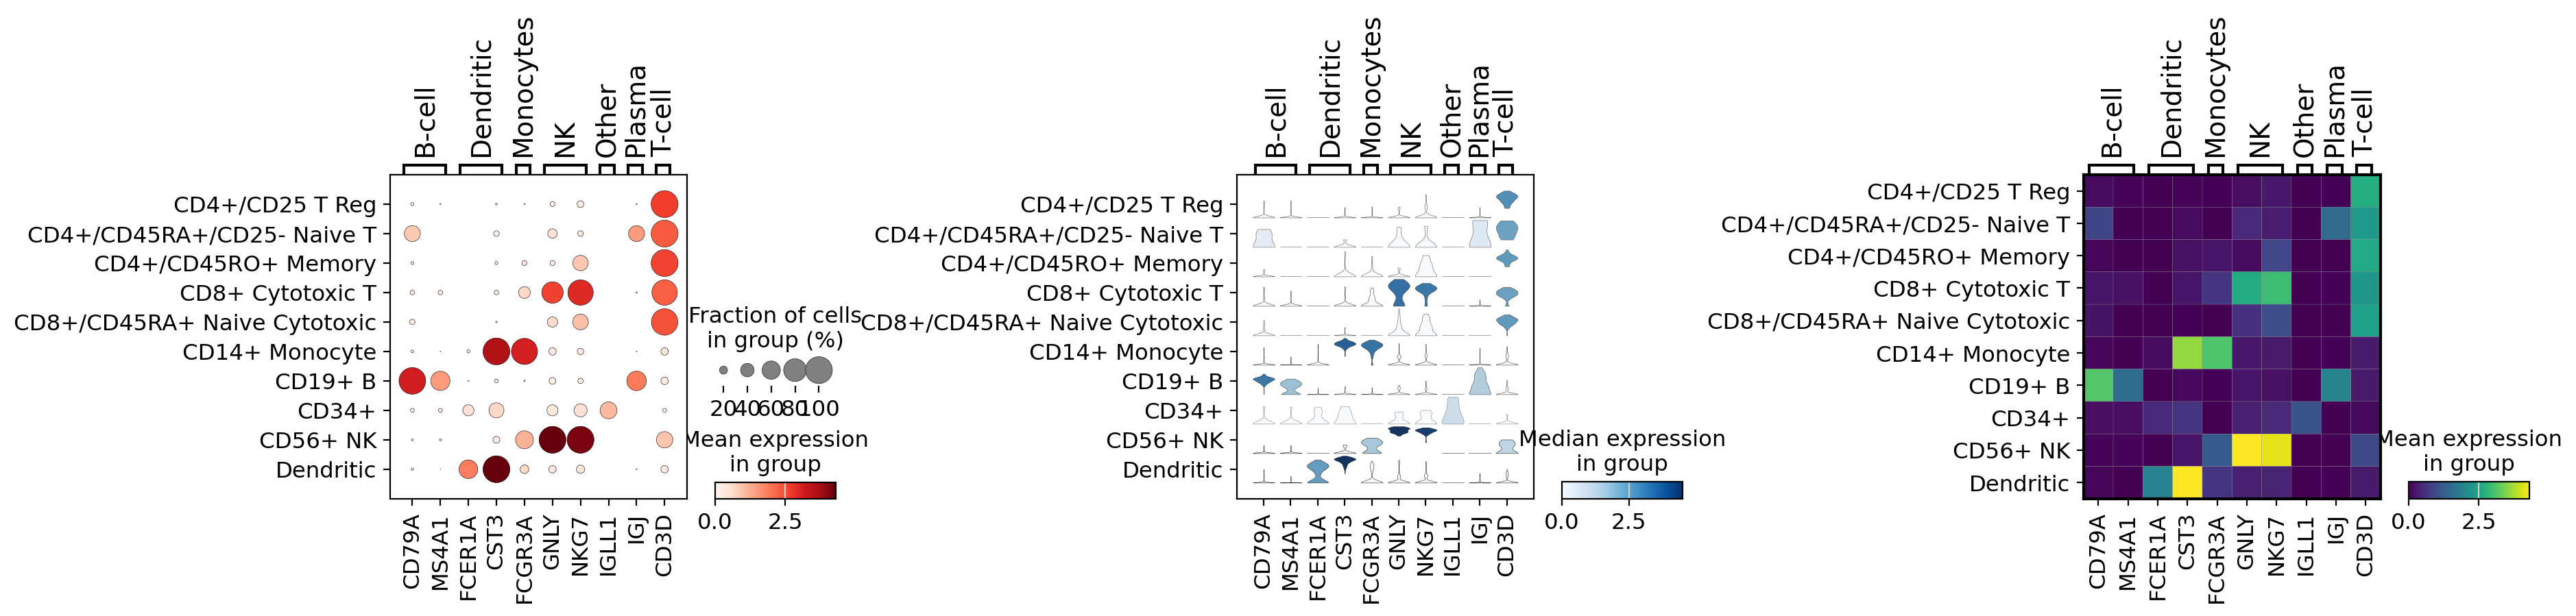

In [40]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,4), gridspec_kw={'wspace':0.9})

ax1_dict = sc.pl.dotplot(pbmc, marker_genes_dict, groupby='bulk_labels', ax=ax1, show=False)
ax2_dict = sc.pl.stacked_violin(pbmc, marker_genes_dict, groupby='bulk_labels', ax=ax2, show=False)
ax3_dict = sc.pl.matrixplot(pbmc, marker_genes_dict, groupby='bulk_labels', ax=ax3, show=False, cmap='viridis')

### Heatmaps

Each cells is shown in a row (or column if swap_axes=True). The groupby info can be added and is shown using the same color code found for `sc.pl.umap` or any other embedding.

categories: 0, 1, 2, etc.
var_group_labels: B-cell, Dendritic, Monocytes, etc.


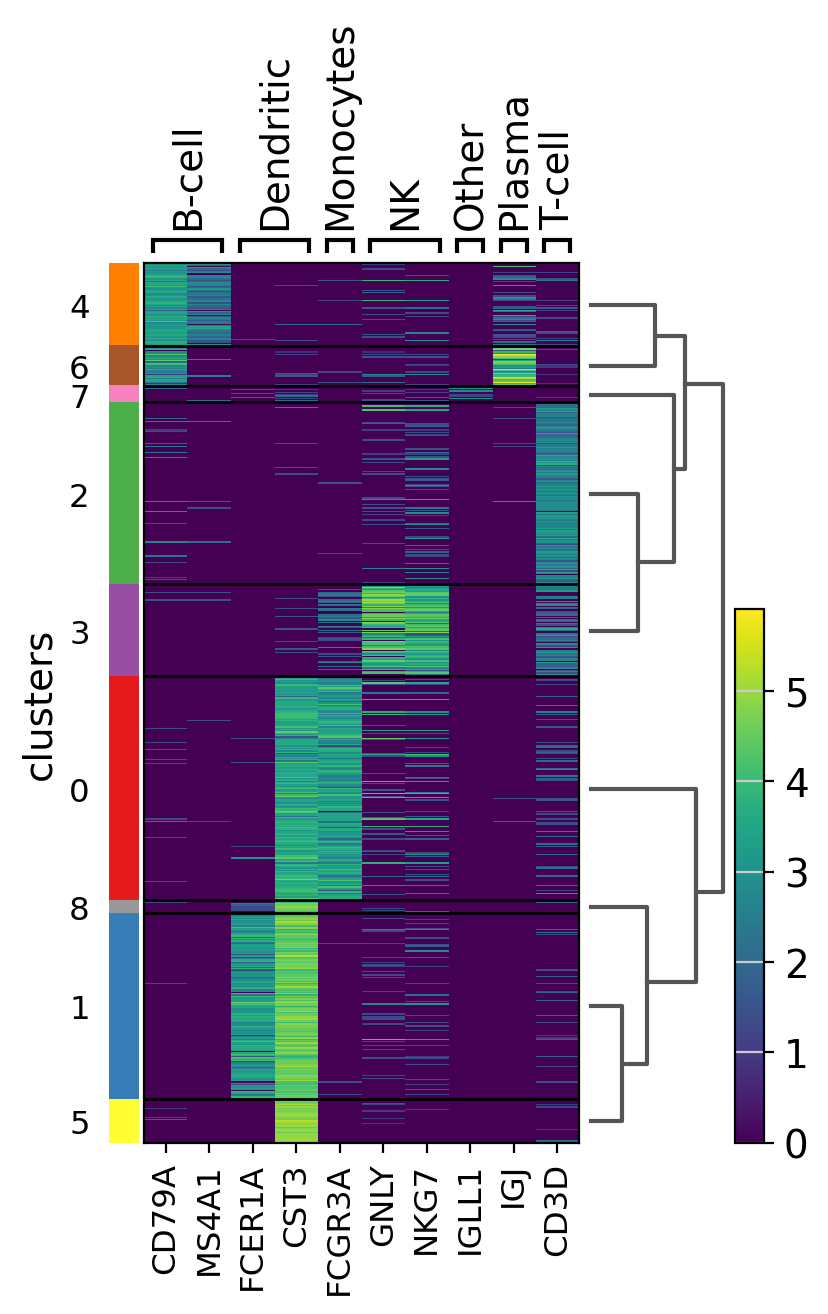

In [41]:
ax = sc.pl.heatmap(pbmc, marker_genes_dict, groupby='clusters', cmap='viridis', dendrogram=True)

The heatmap can also be plotted on scaled data. The min and max has been adjusted and a divergent color map is used.

categories: 0, 1, 2, etc.
var_group_labels: B-cell, Dendritic, Monocytes, etc.


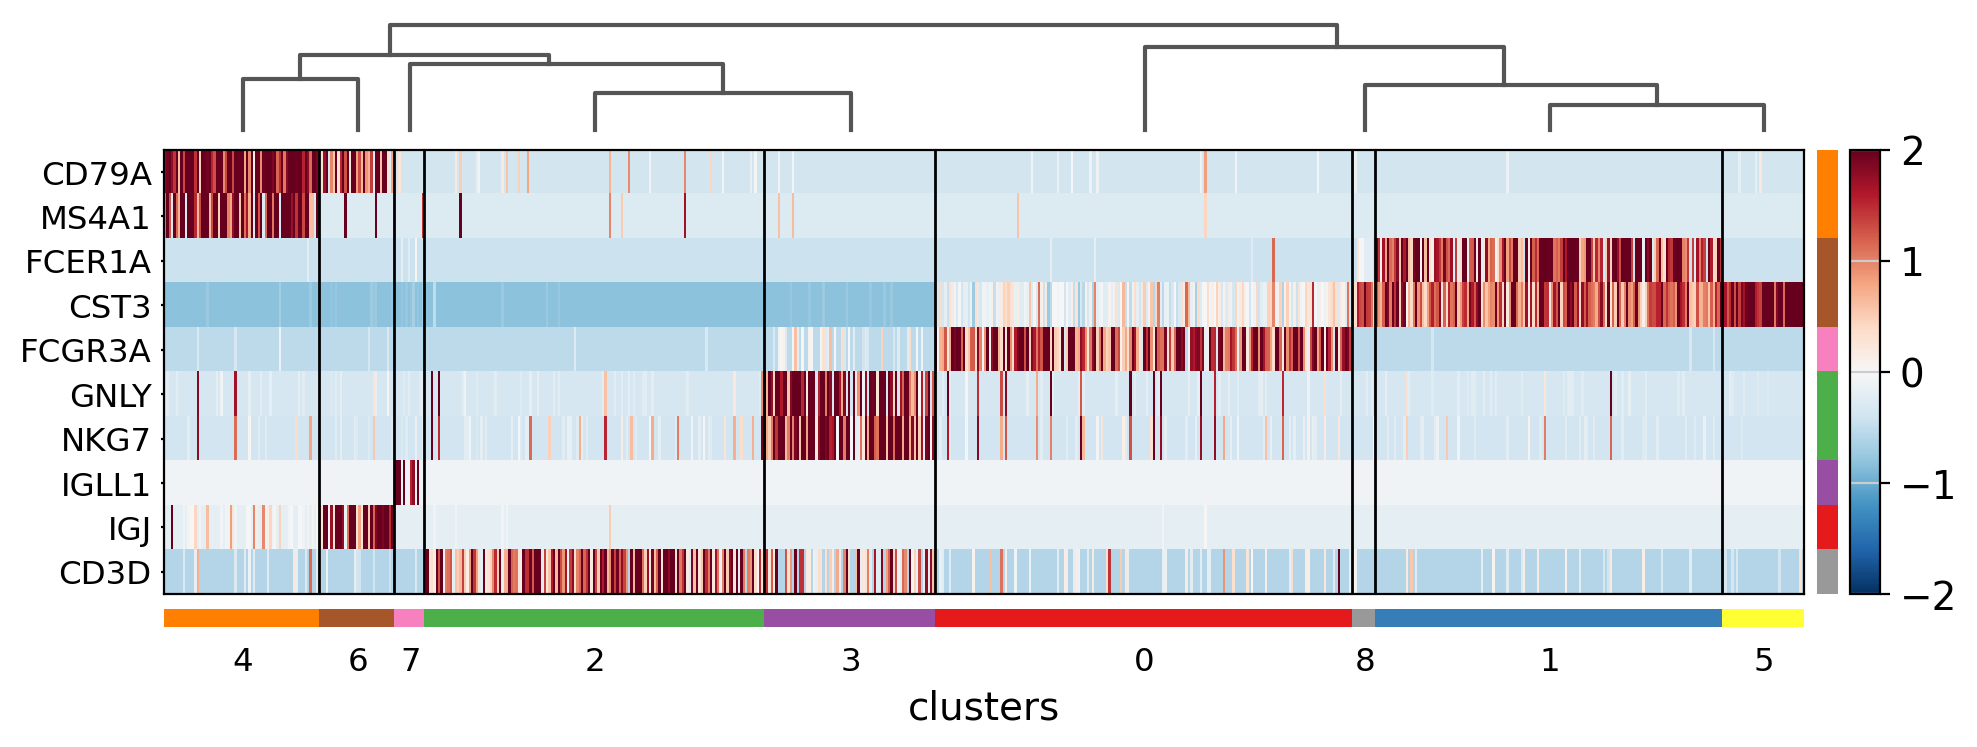

In [42]:
ax = sc.pl.heatmap(pbmc, marker_genes_dict, groupby='clusters', layer='scaled', vmin=-2, vmax=2, cmap='RdBu_r', dendrogram=True, swap_axes=True, figsize=(11,4))

### Tracksplot

The track plot shows the same info as the heatmap, but instead of a color scale, the gene expression is represented by height.

categories: 0, 1, 2, etc.
var_group_labels: B-cell, Dendritic, Monocytes, etc.


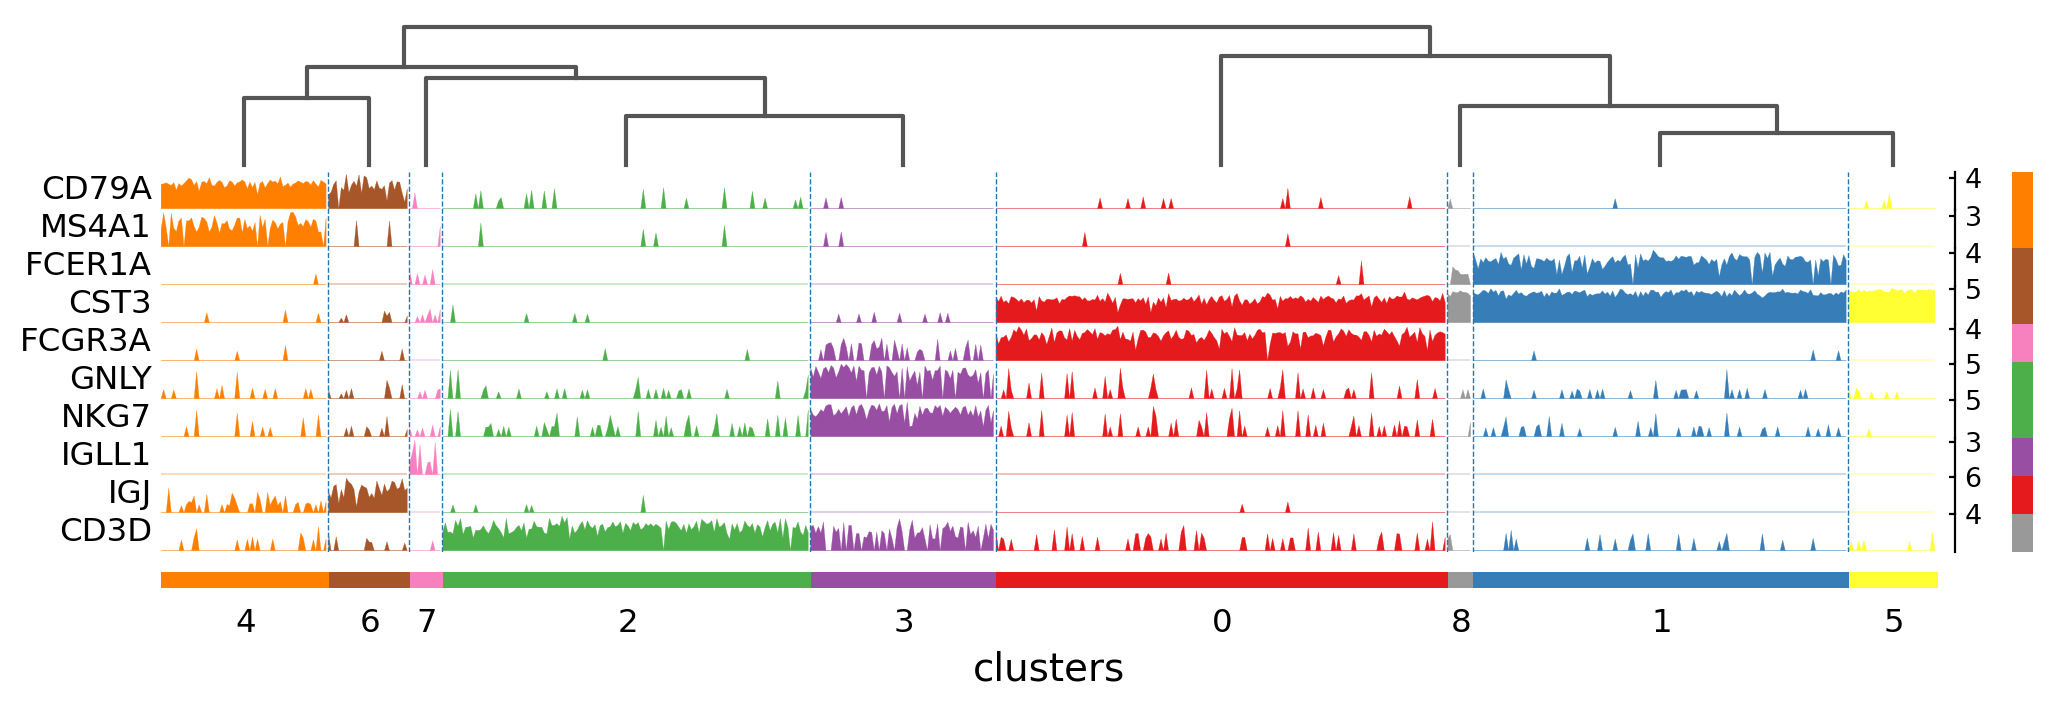

In [43]:
ax = sc.pl.tracksplot(pbmc, marker_genes_dict, groupby='clusters', dendrogram=True)

## Visualization of marker genes

We can also identify genes that are differentially expressed in the clusters or groups.

To identify differentially expressed genes, run `sc.tl.rank_genes_groups`. This function will take each group of cells and compare the distribution of each gene in a group against the distribution in all other cells not in the group.

In [46]:
sc.tl.rank_genes_groups(pbmc, groupby='clusters', method='wilcoxon')

### Visualize marker genes using dotplot

The dotplot visualization is useful to get an overview of the genes that show differential expression. To make the image more compact, use `n_genes=4` to show only the top 4 scoring genes.

/home/mesqueda/miniconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


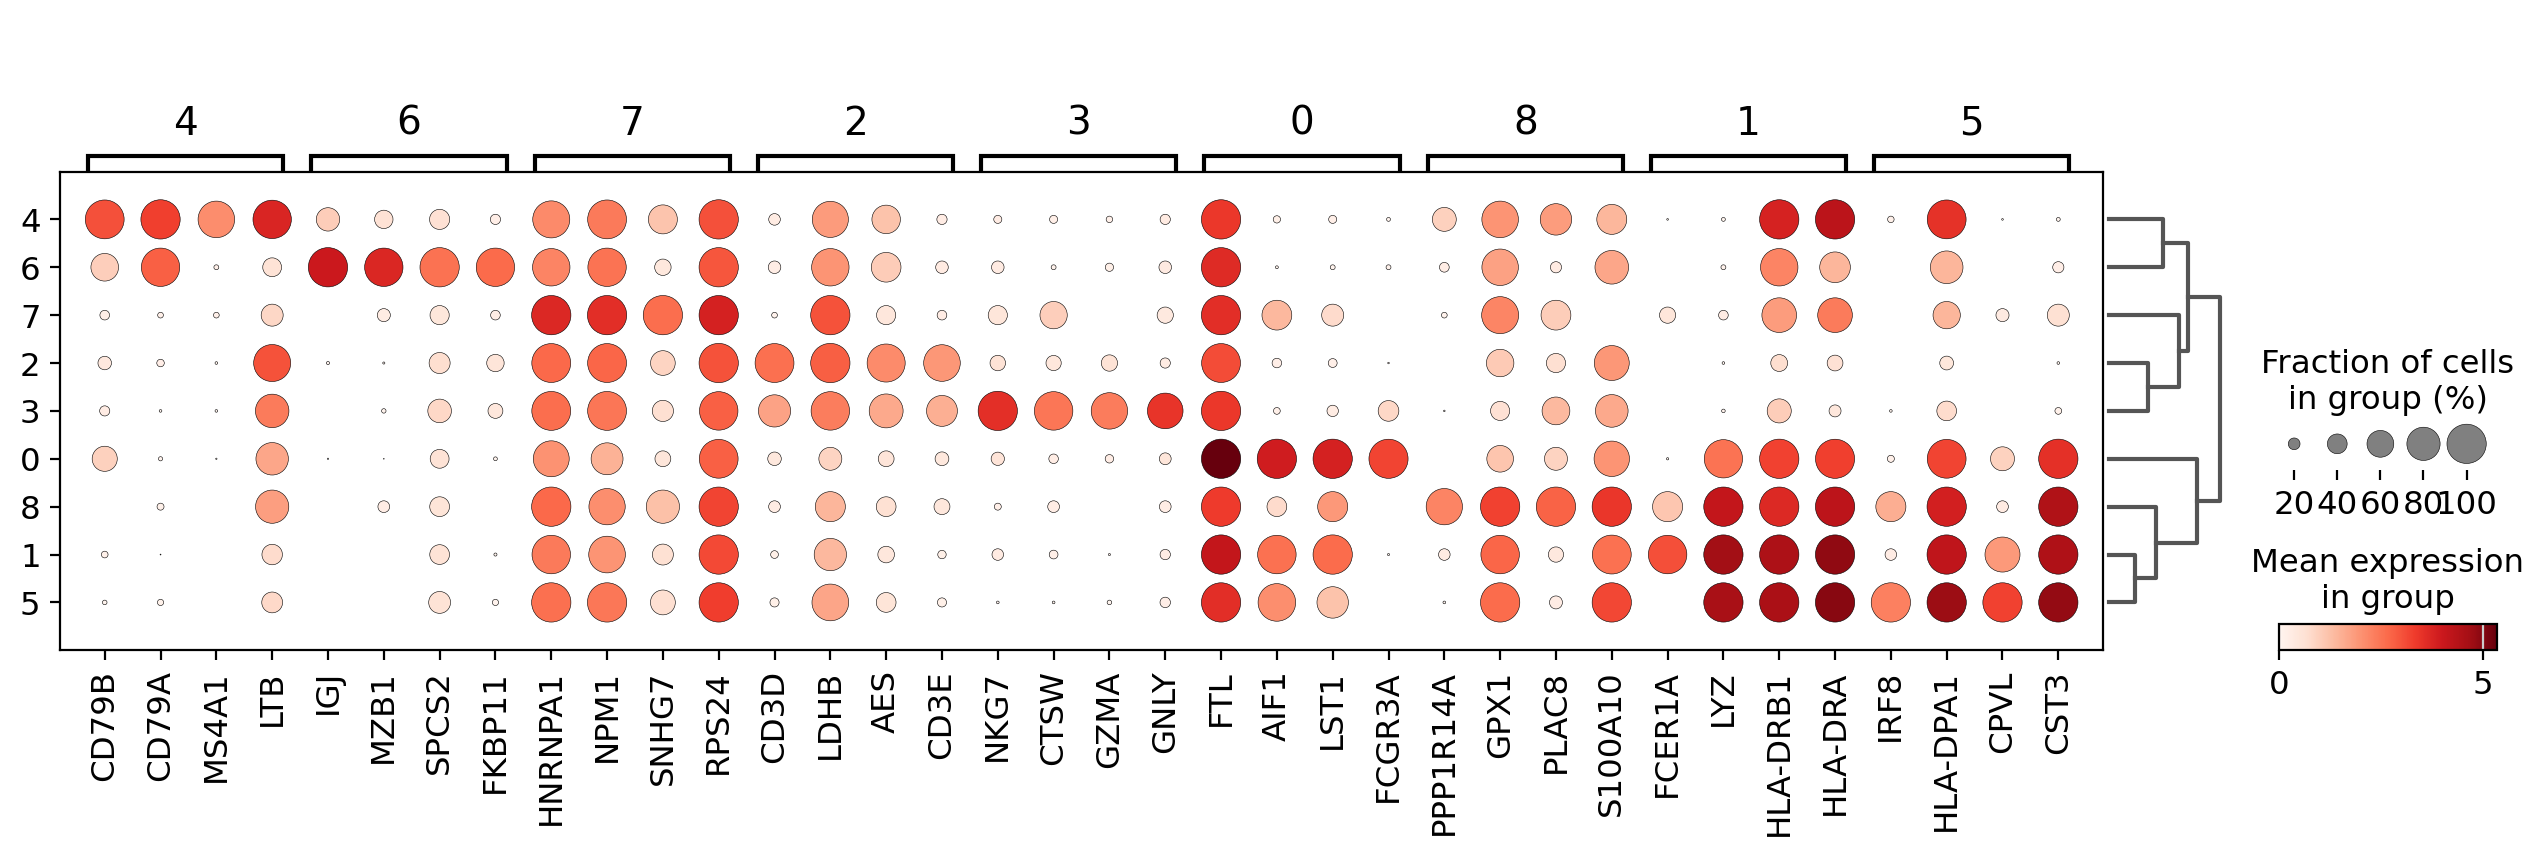

In [48]:
sc.pl.rank_genes_groups_dotplot(pbmc, n_genes=4)

Plot _log fold changes_ insead of gene expression, focussing on genes that have a log fold change >=3 between the cell type expression and the rest of the cells. Set `values_to_plot='logfoldchanges` and `min_logfoldchanges=3`.

Adjust min and max to be plotted and use a divergent color map.

/home/mesqueda/miniconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


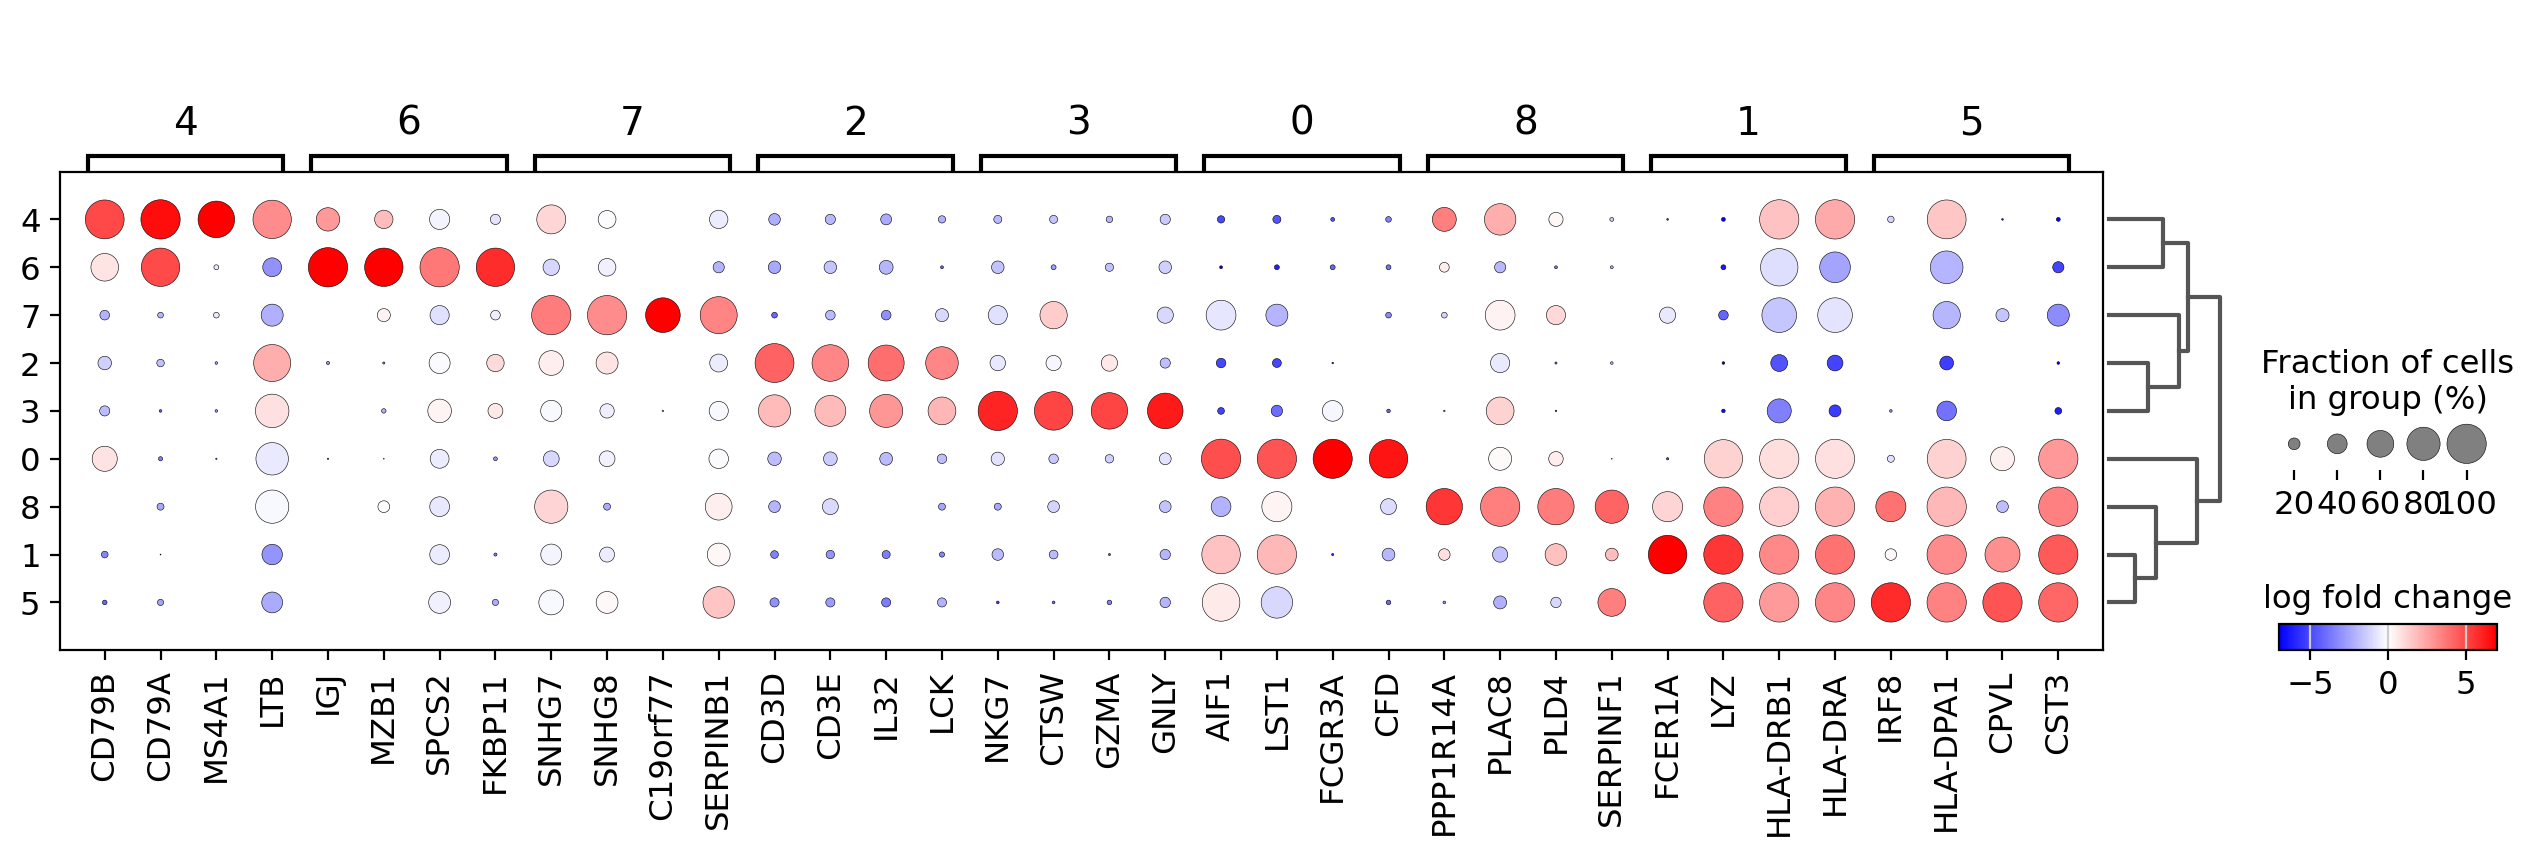

In [49]:
sc.pl.rank_genes_groups_dotplot(pbmc, n_genes=4, values_to_plot='logfoldchanges', min_logfoldchange=3, vmax=7, vmin=-7, cmap='bwr')

### Focusing on particular groups

Use a dotplot only on two groups, set `n_genes=30`which will show all the genes that have a `min_logfoldchange=4` up to 30.

categories: 0, 1, 2, etc.
var_group_labels: 1, 5


/home/mesqueda/miniconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


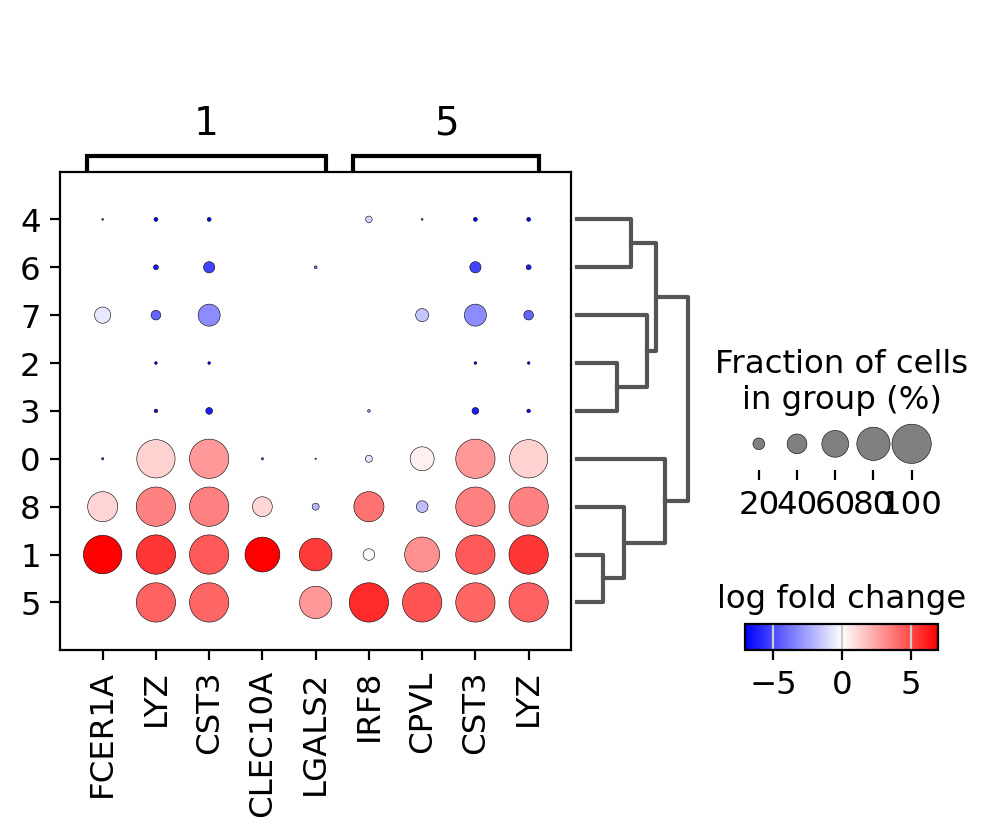

In [50]:
sc.pl.rank_genes_groups_dotplot(pbmc, n_genes=30, values_to_plot='logfoldchanges', min_logfoldchange=4, vmax=7, vmin=-7, cmap='bwr', groups=['1', '5'])

### Visualize marker genes using matrixplot

Use the previosuly computed 'scaled' values (stored in layer `scaled`) and use a divergent color map.

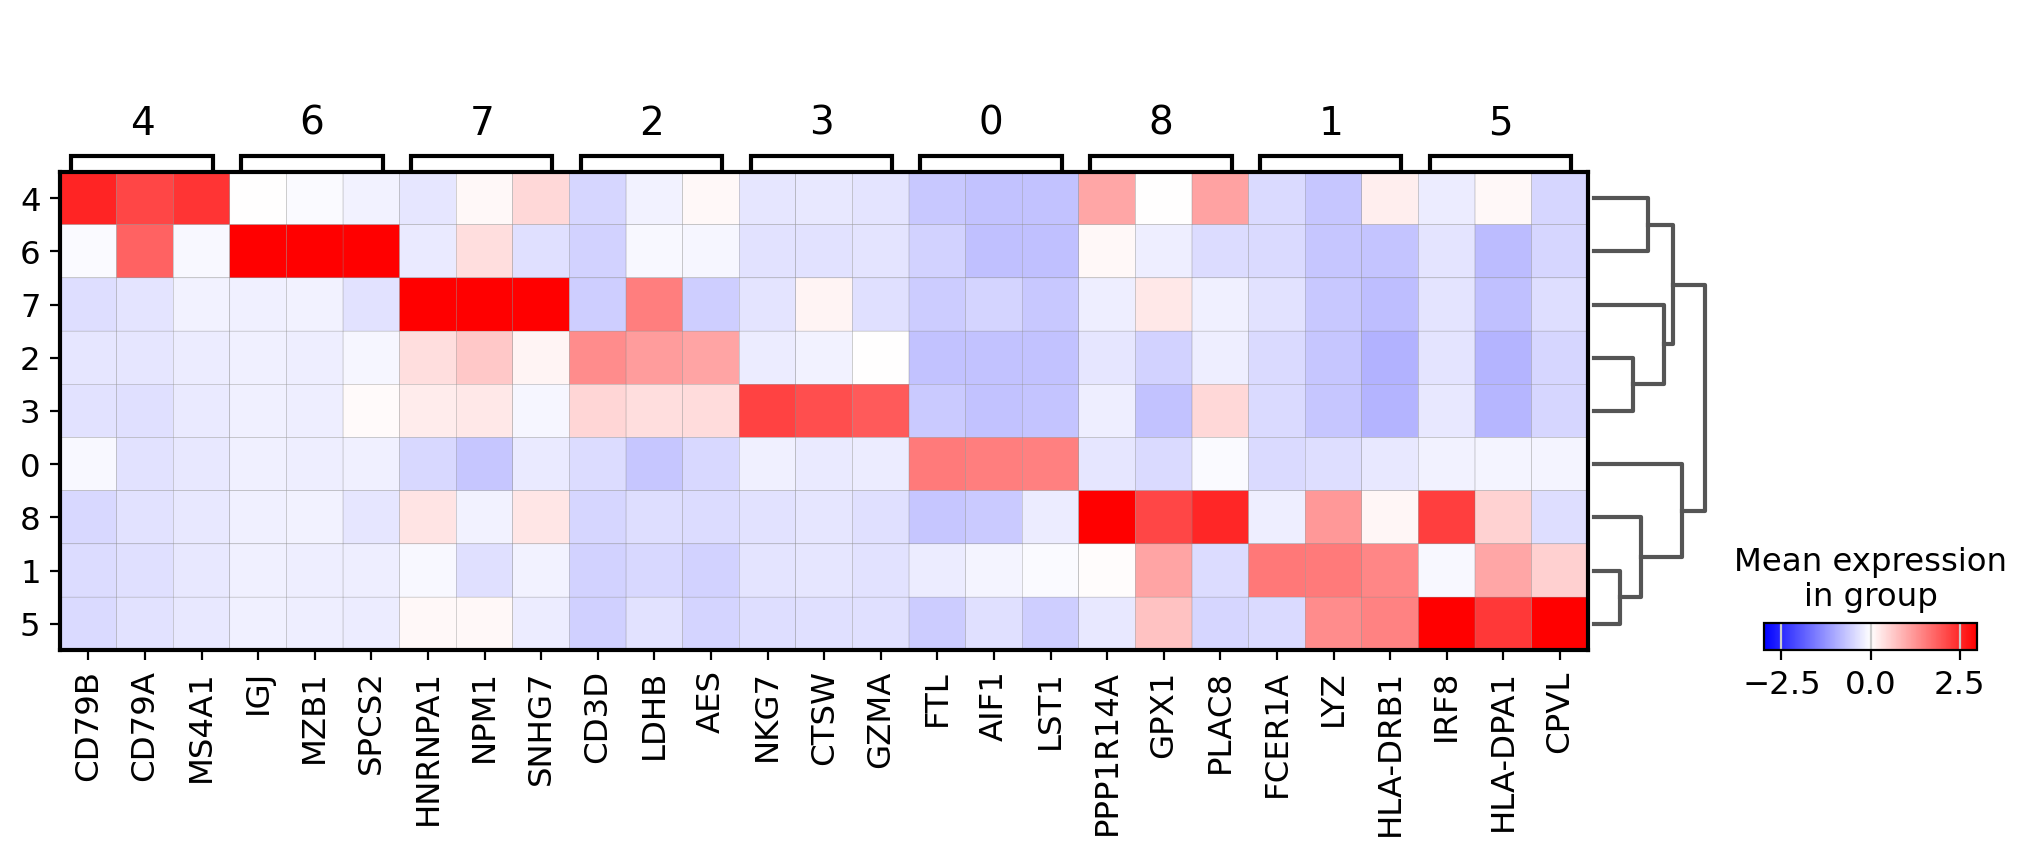

In [51]:
sc.pl.rank_genes_groups_matrixplot(pbmc, n_genes=3, use_raw=False, vmin=-3, vmax=3, cmap='bwr', layer='scaled')

### Visualize marker genes using stacked violin plots

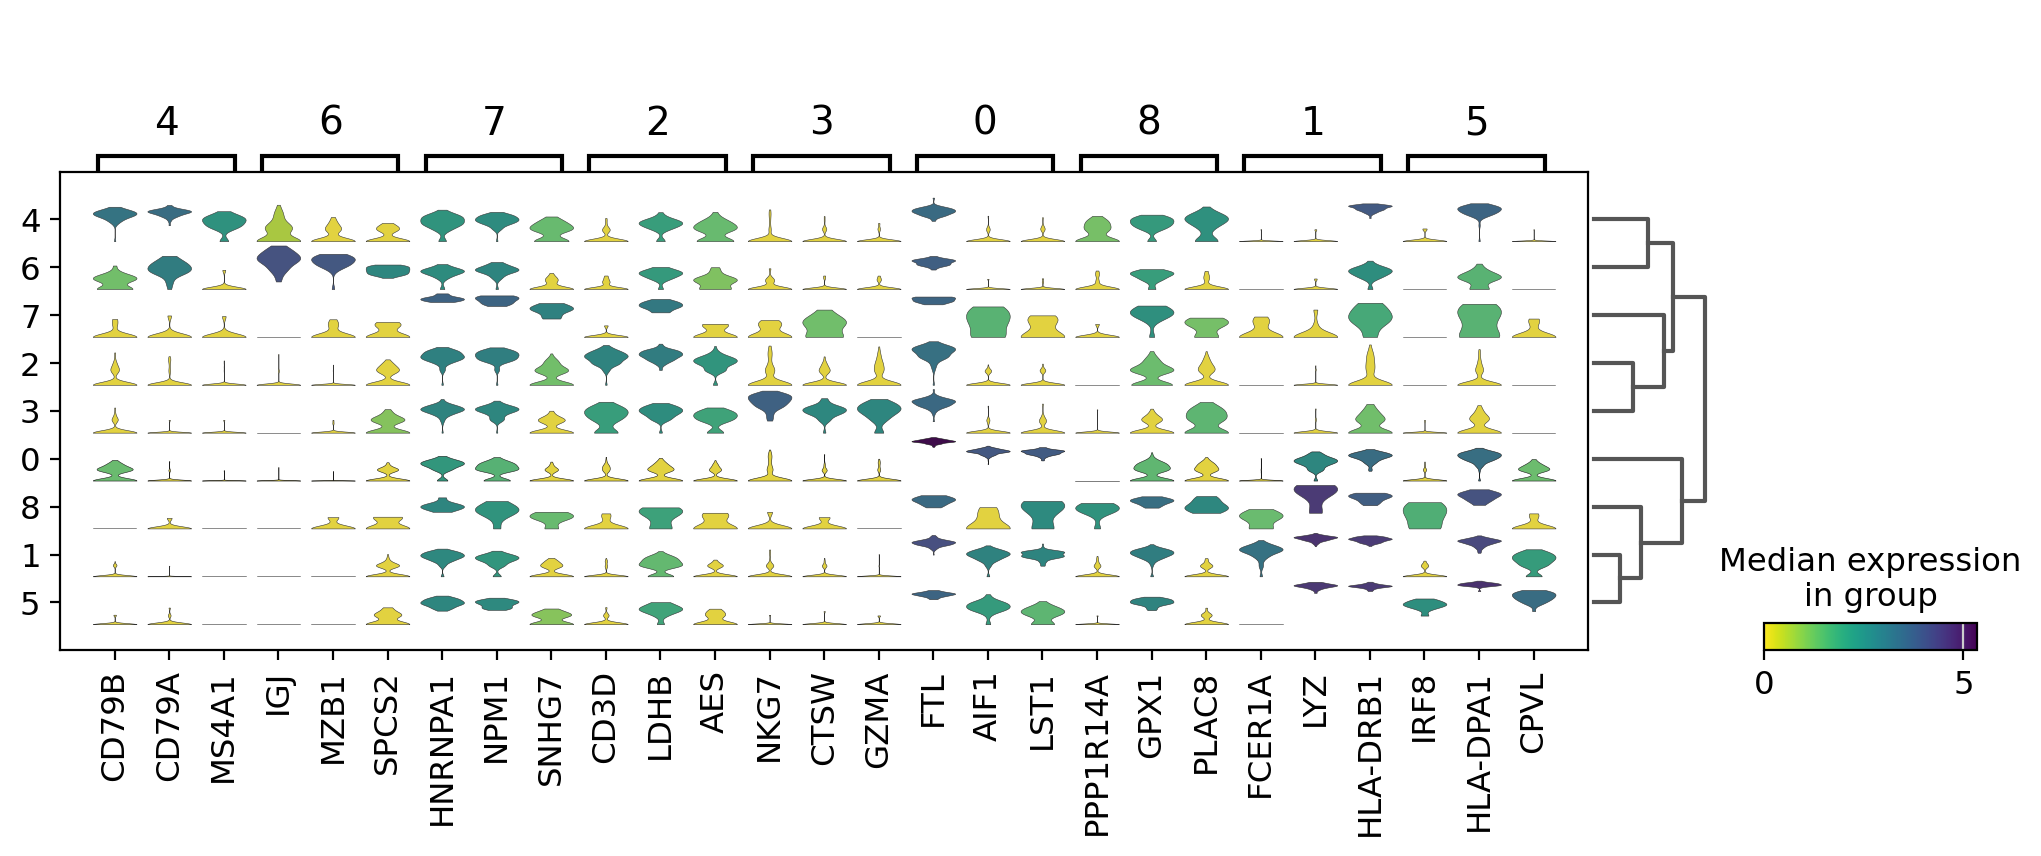

In [52]:
sc.pl.rank_genes_groups_stacked_violin(pbmc, n_genes=3, cmap='viridis_r')

### Visualize marker genes using heatmap

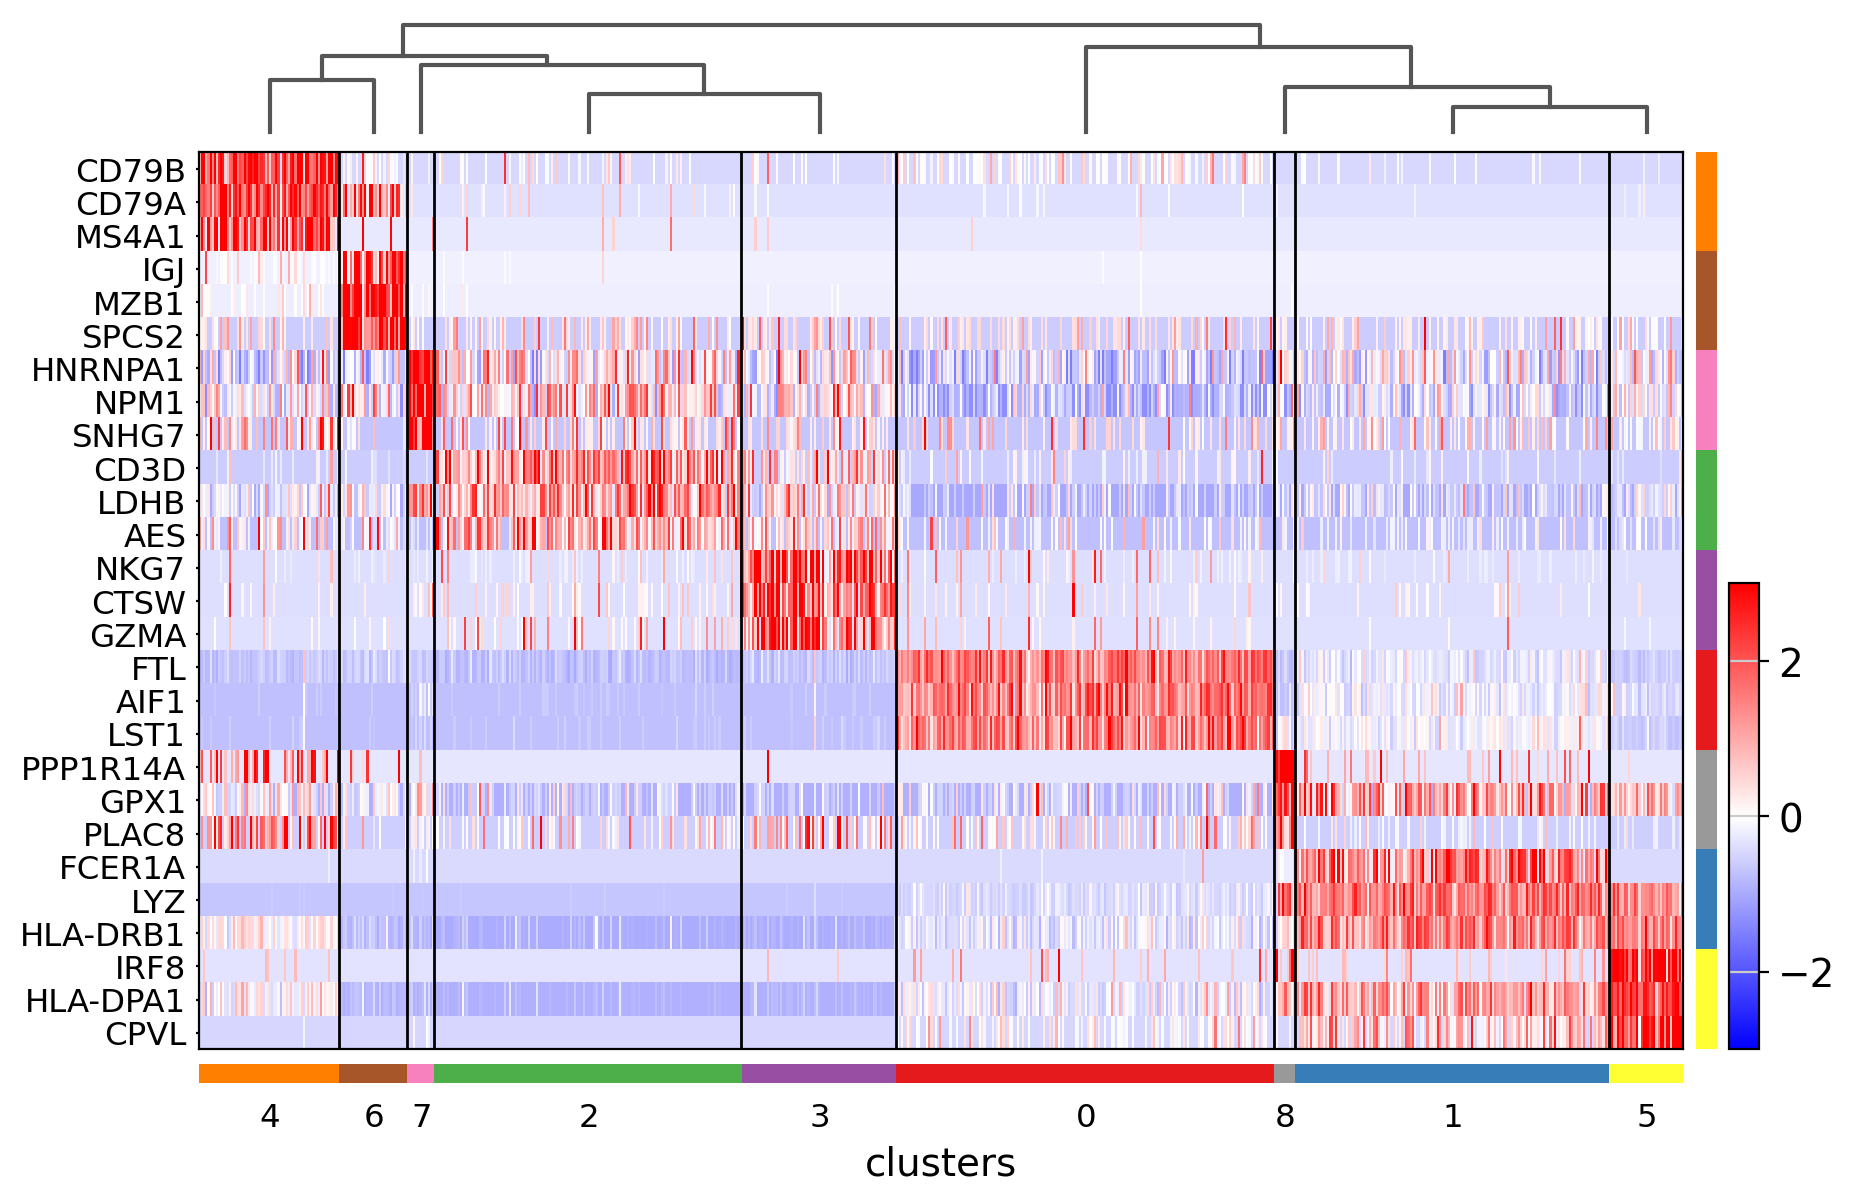

In [53]:
sc.pl.rank_genes_groups_heatmap(pbmc, n_genes=3, use_raw=False, swap_axes=True, vmin=-3, vmax=3, cmap='bwr', layer='scaled', figsize=(10,7), show=False);

Show 10 genes per category, turn off gene labels and swap the axes.

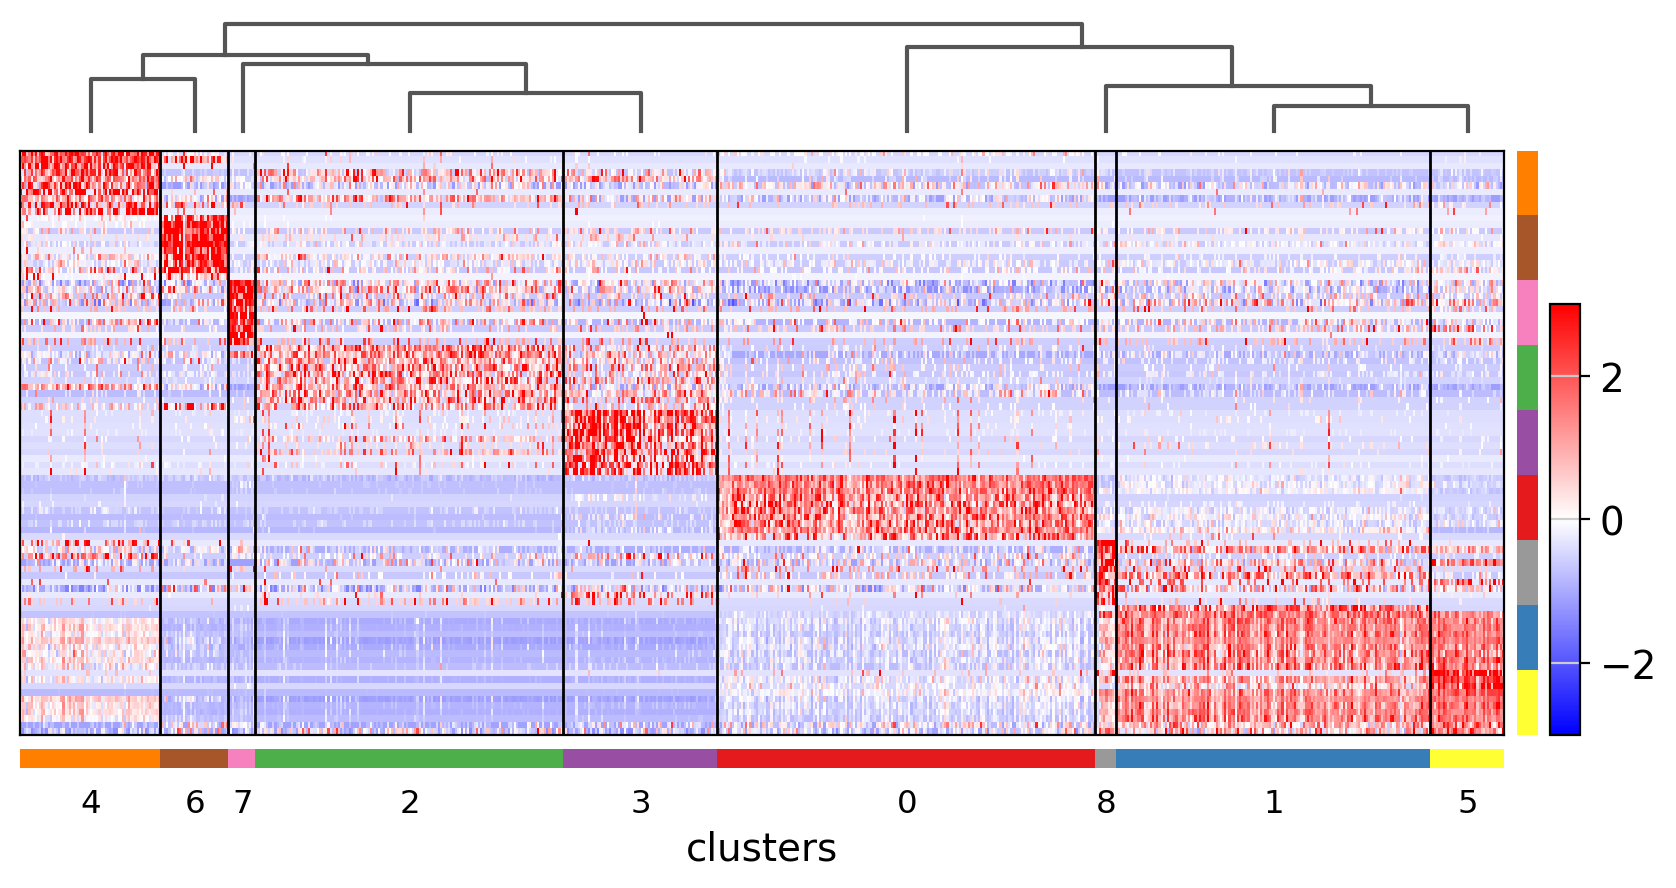

In [54]:
sc.pl.rank_genes_groups_heatmap(pbmc, n_genes=10, use_raw=False, swap_axes=True, show_gene_labels=False,
                                vmin=-3, vmax=3, cmap='bwr')

### Visualize marker genes using tracksplot

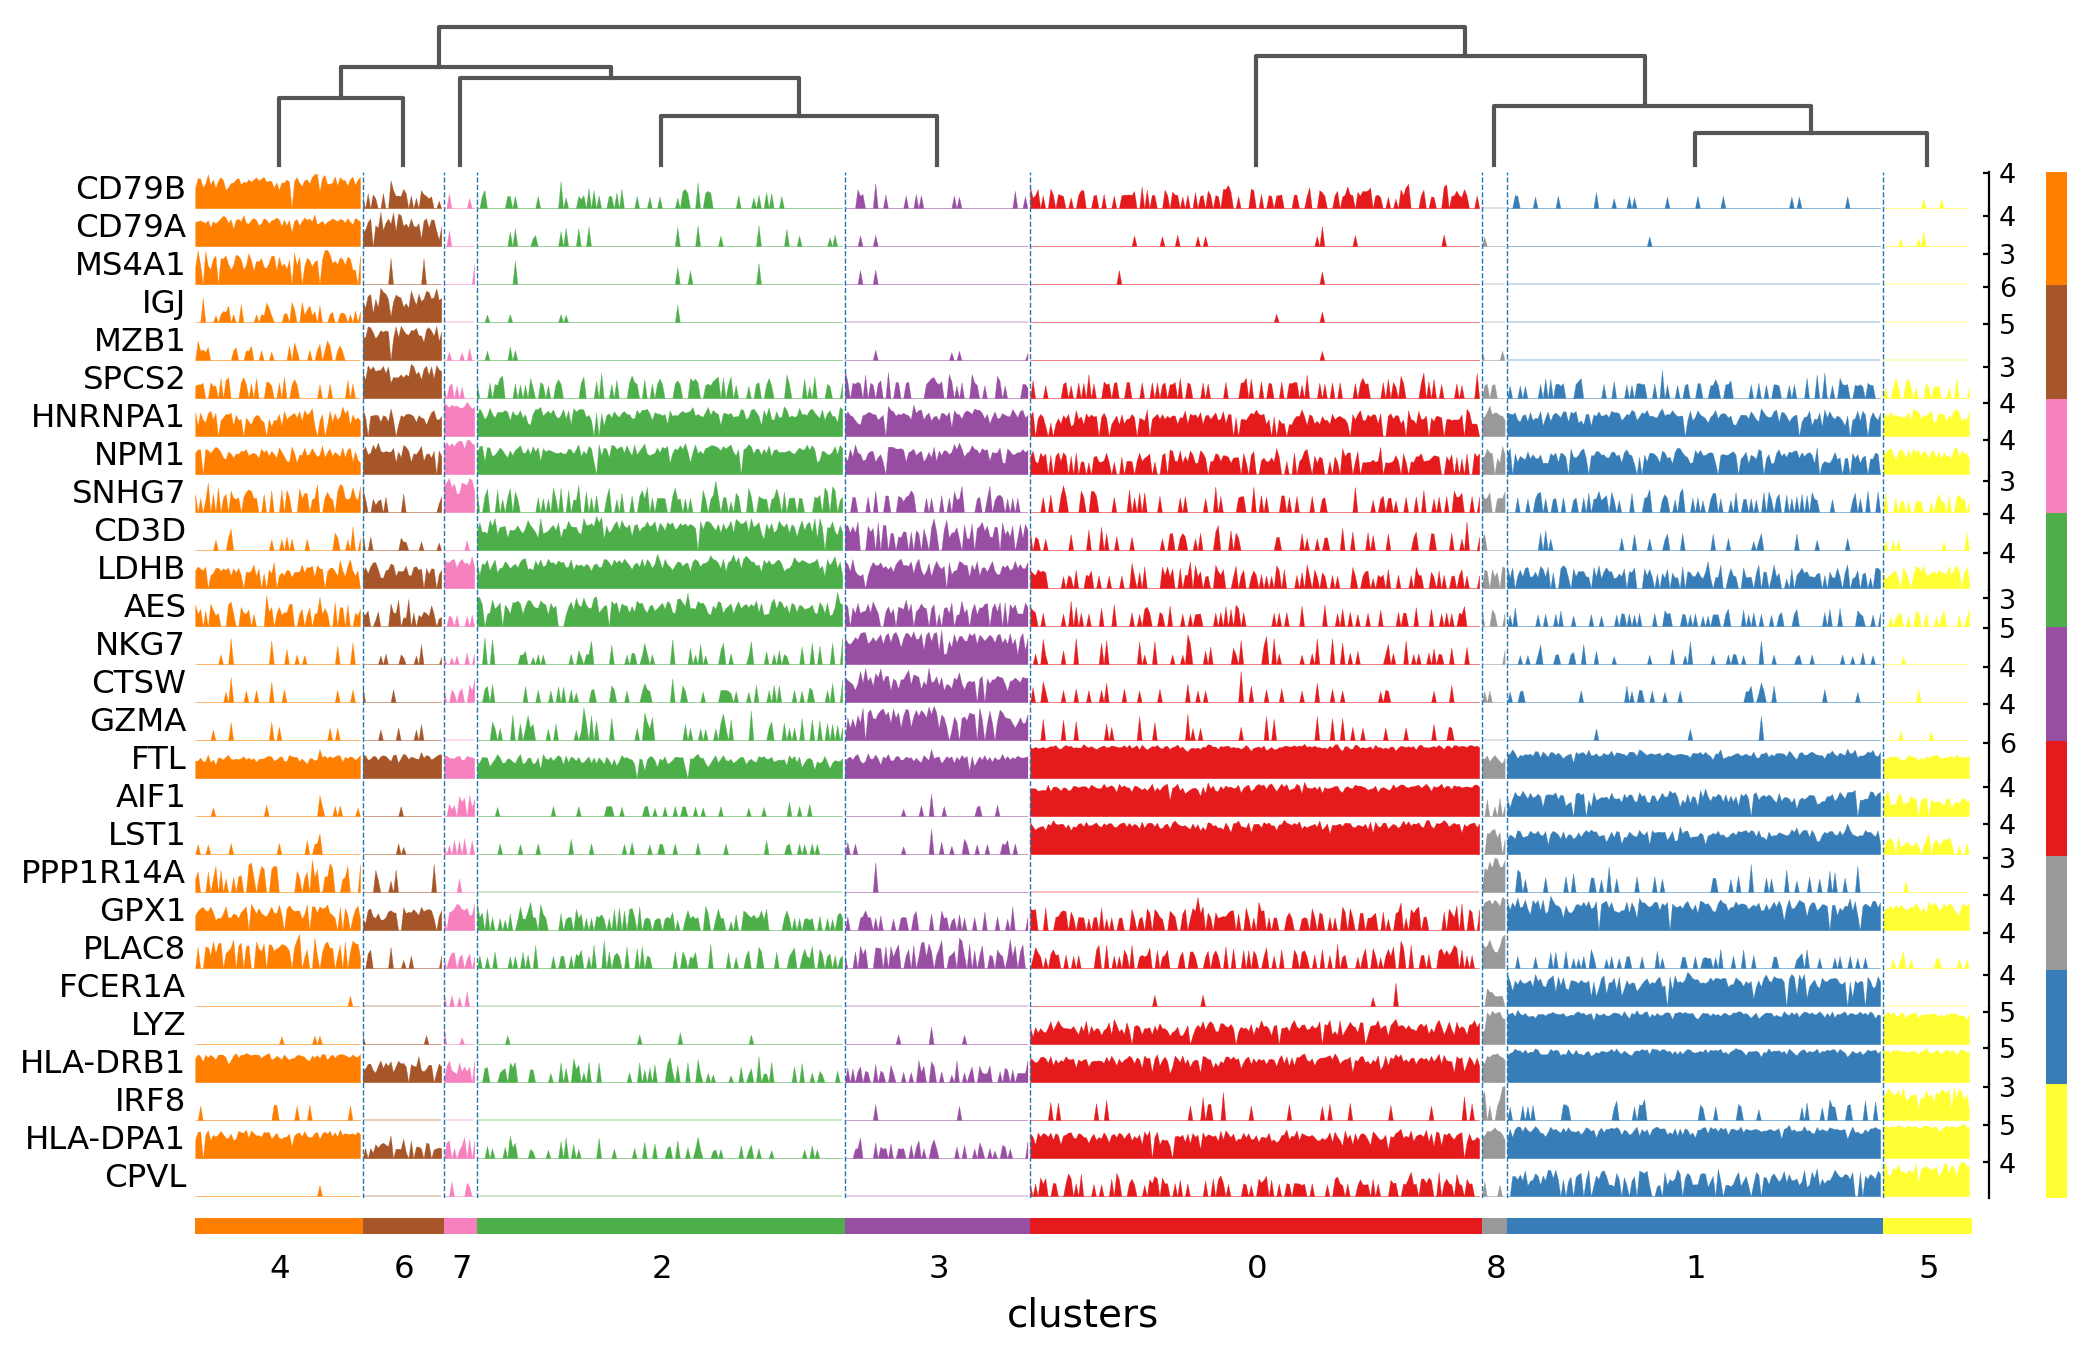

In [55]:
sc.pl.rank_genes_groups_tracksplot(pbmc, n_genes=3)

### Comparison of marker genes using split violin plots

Compare marker genes using split violin plots for all groups at once.

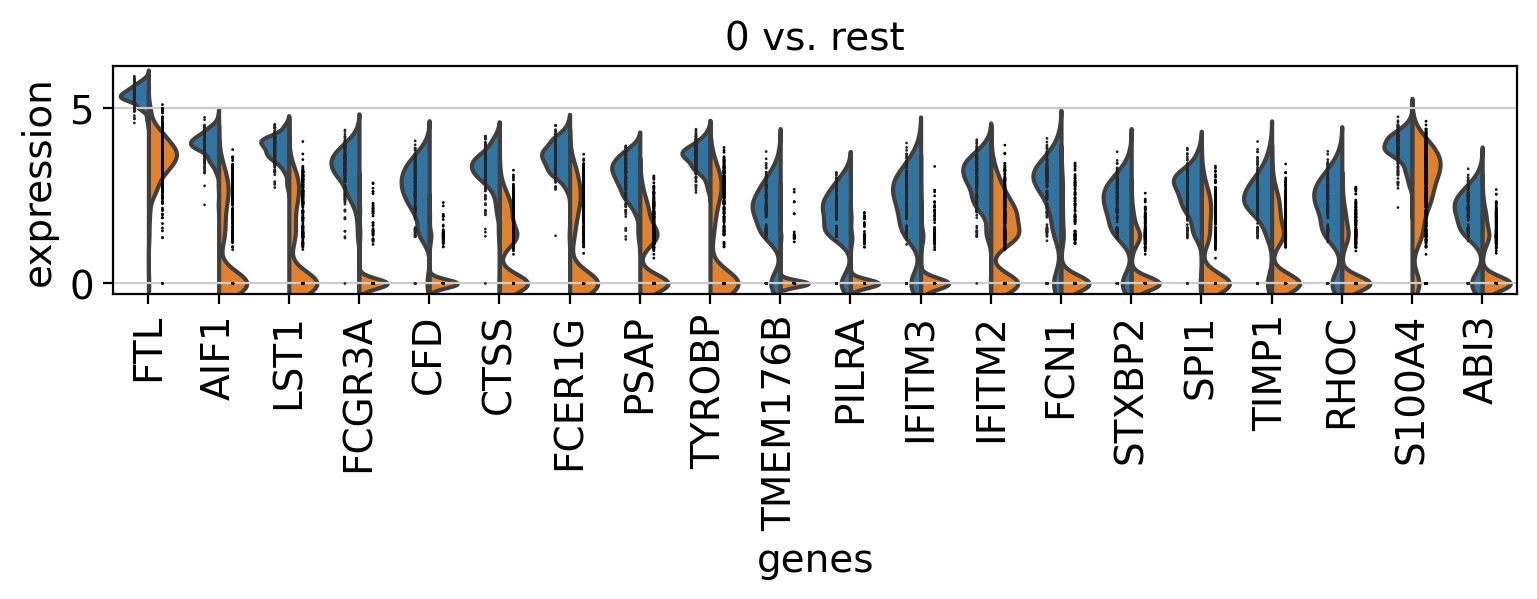

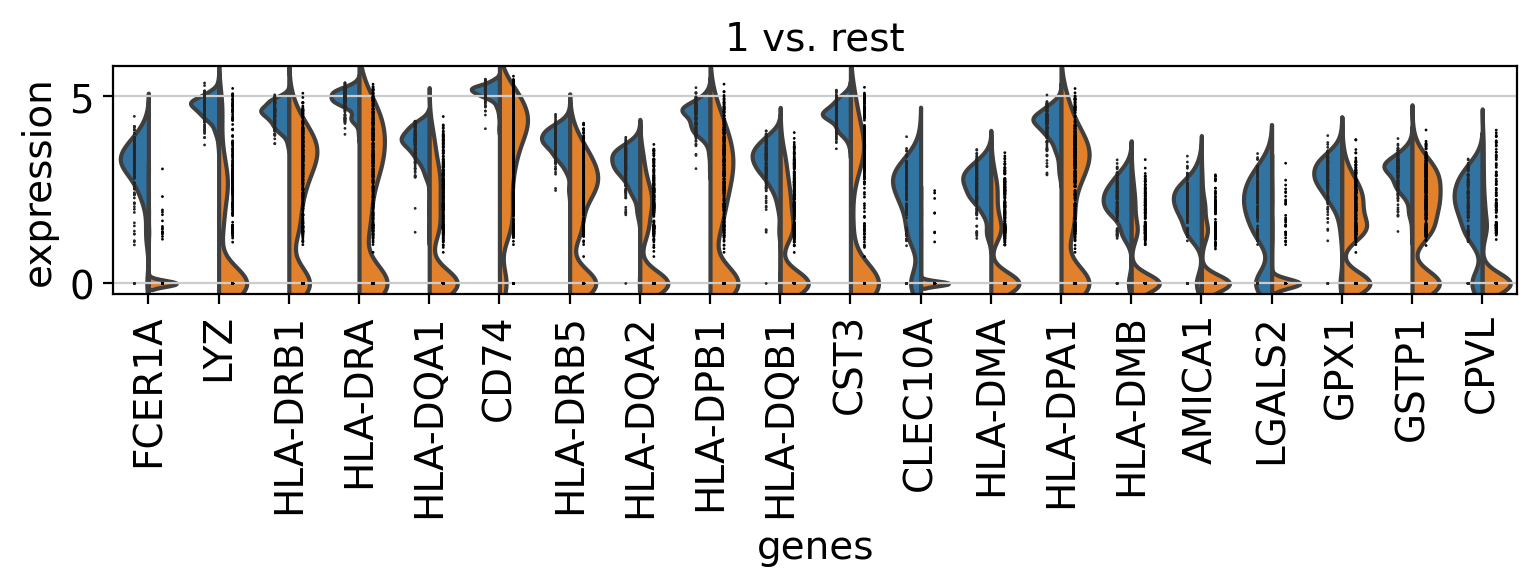

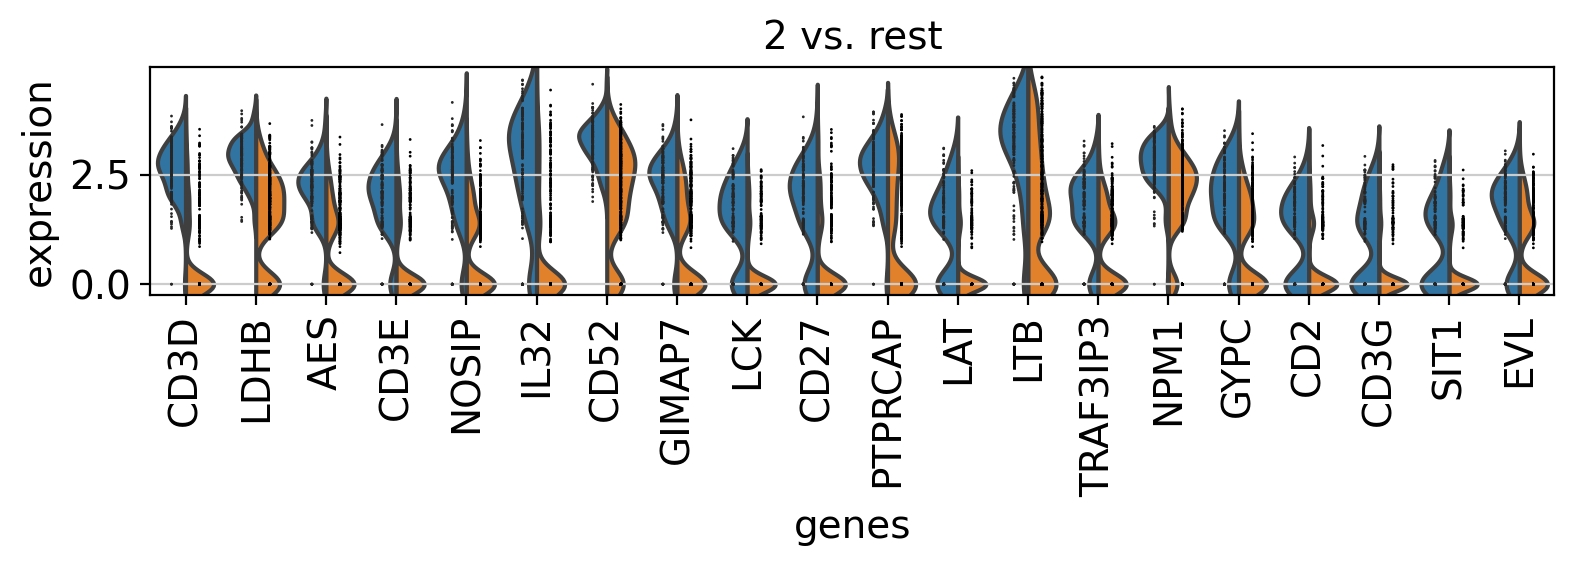

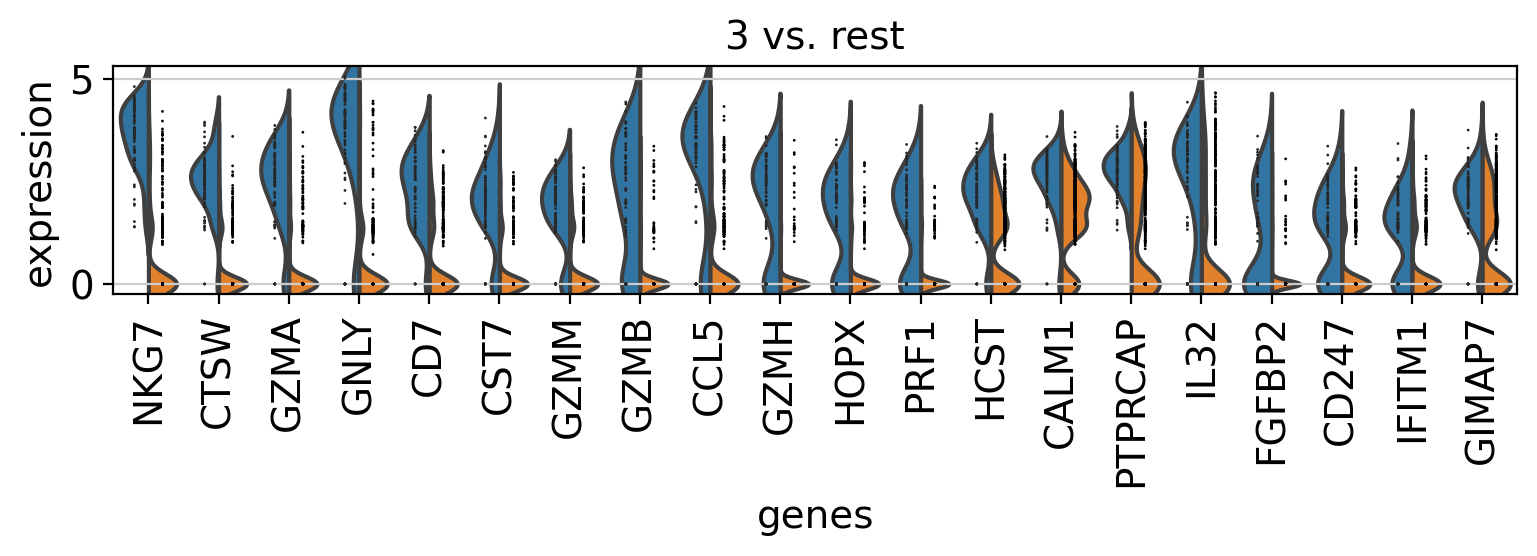

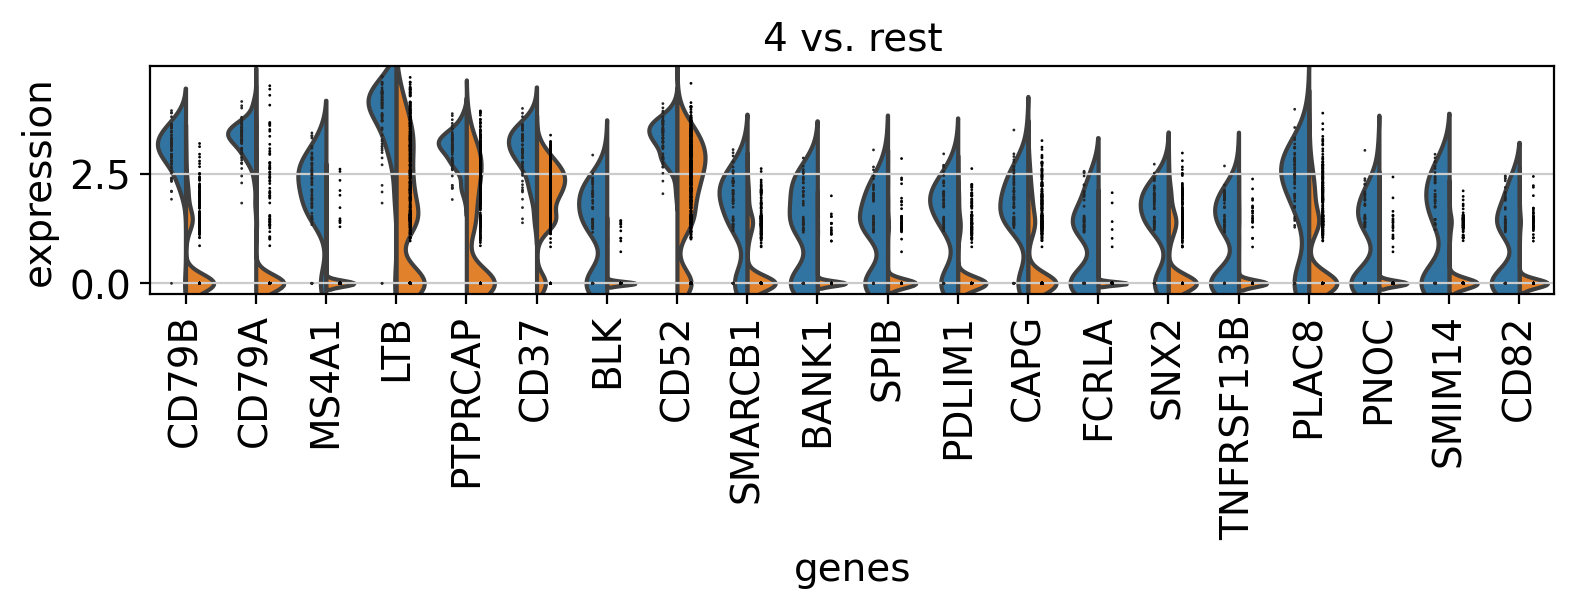

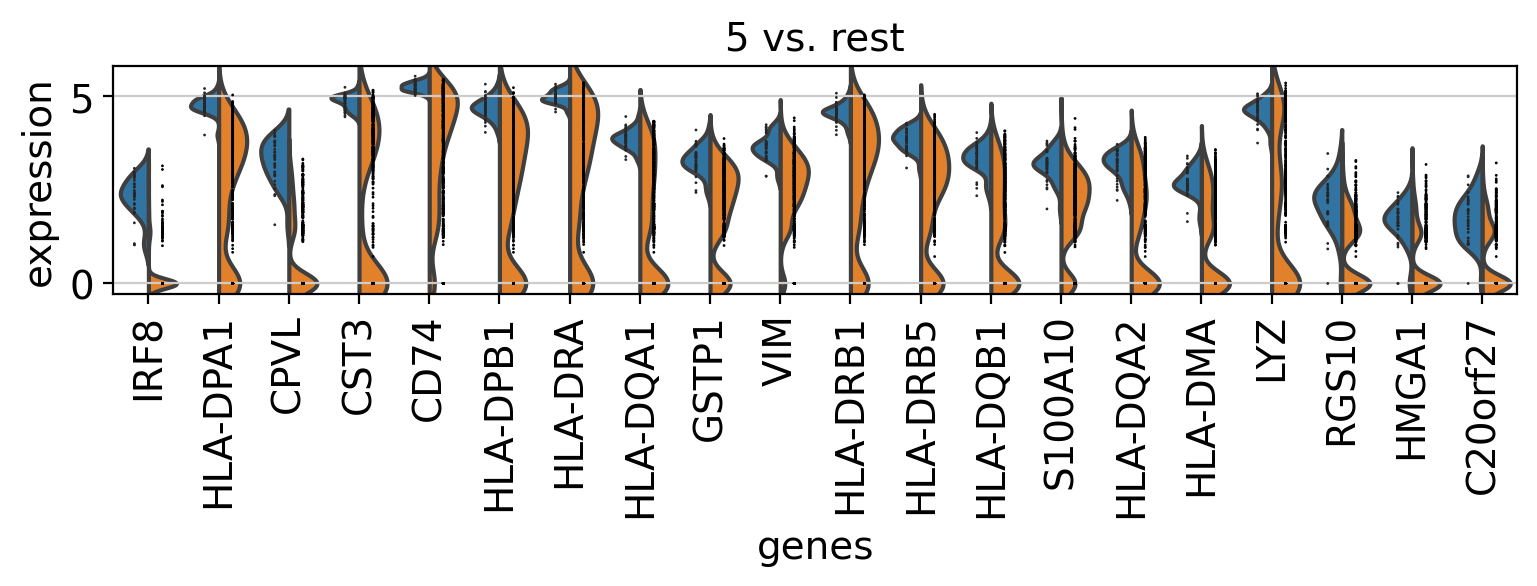

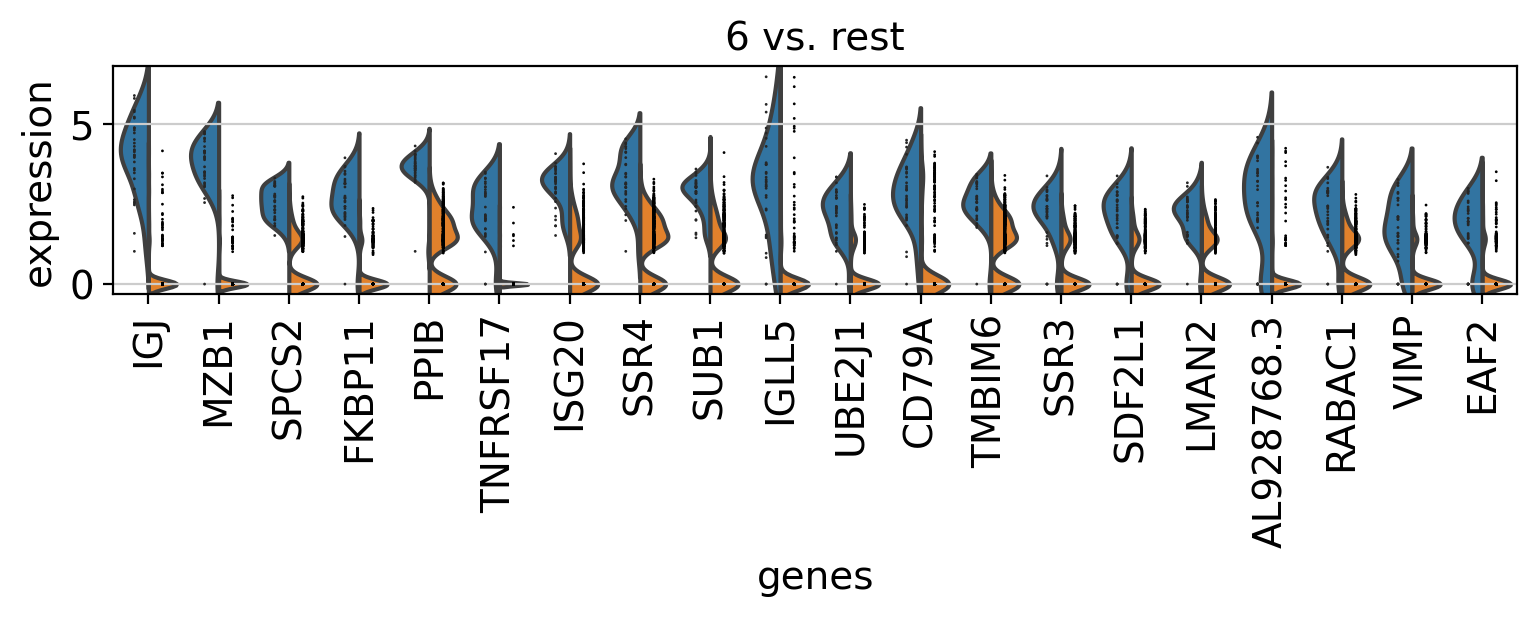

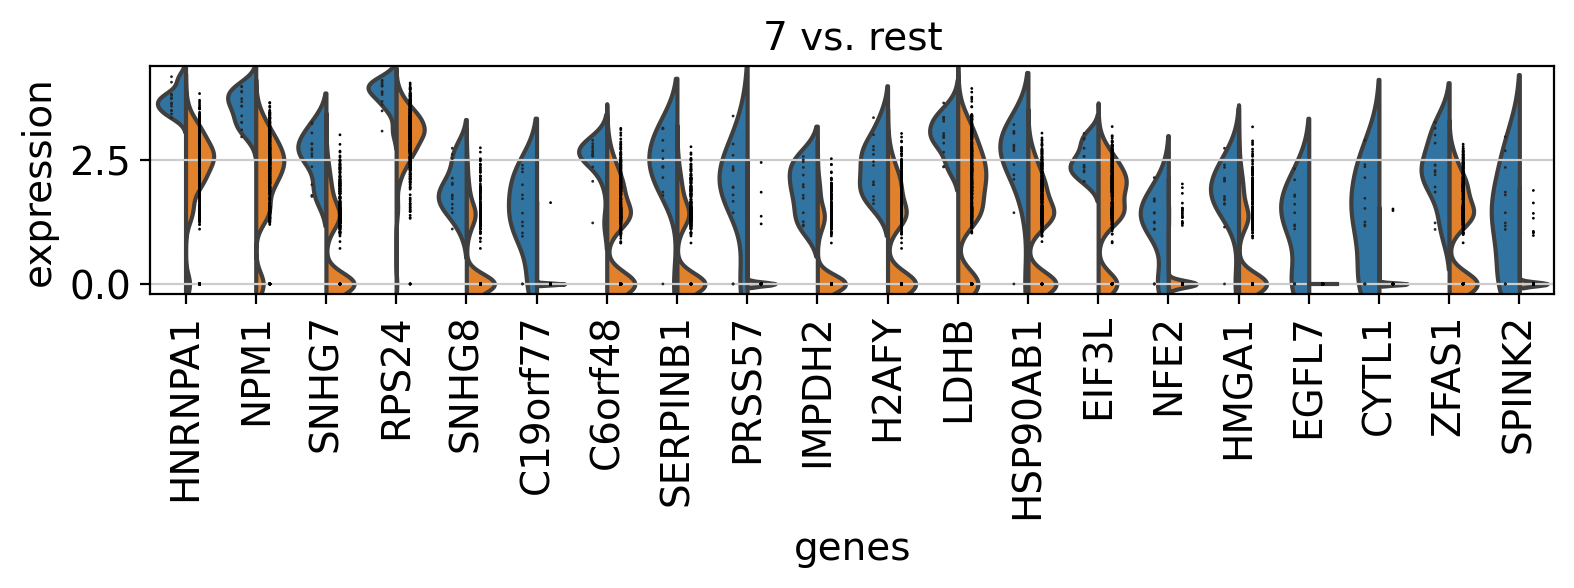

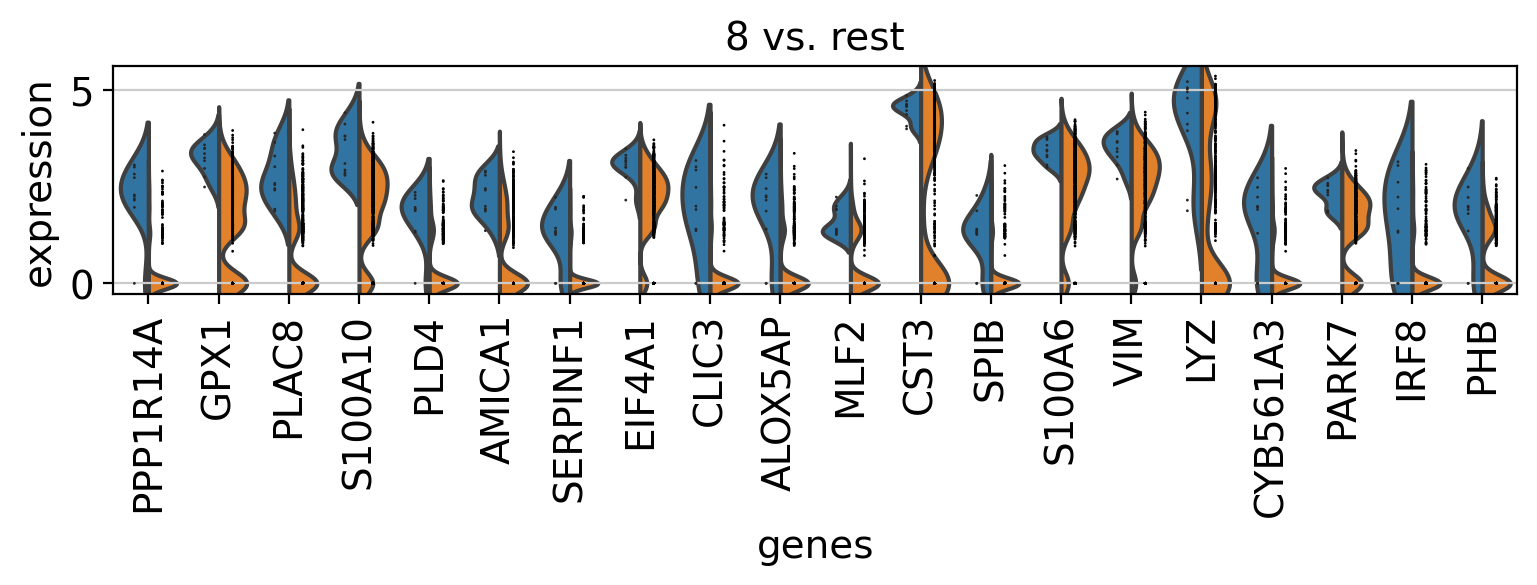

In [56]:
with rc_context({'figure.figsize': (9, 1.5)}):
    sc.pl.rank_genes_groups_violin(pbmc, n_genes=20, jitter=False)

## Dendrogram options

The dendrogram can also be plotted independently

In [59]:
# compute hierarchical clustering using PCs
sc.tl.dendrogram(pbmc, 'bulk_labels')

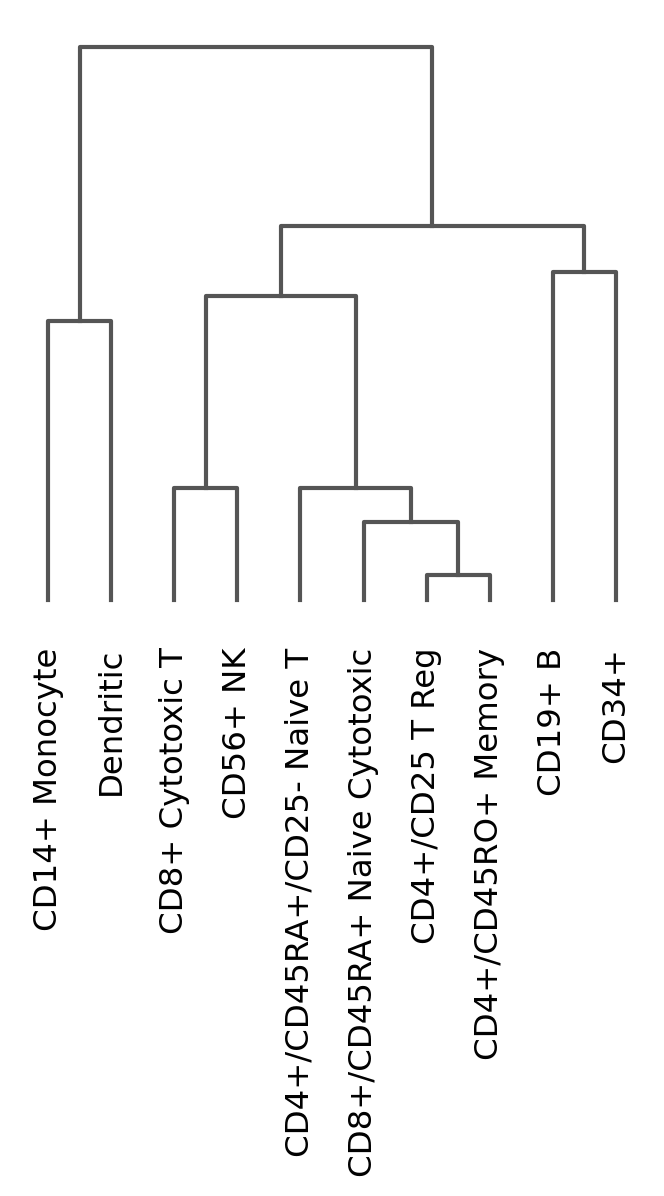

In [60]:
ax = sc.pl.dendrogram(pbmc, 'bulk_labels')

## Plot correlation

With the dendrogram, plot the correlation (by default 'pearson') of the categories.

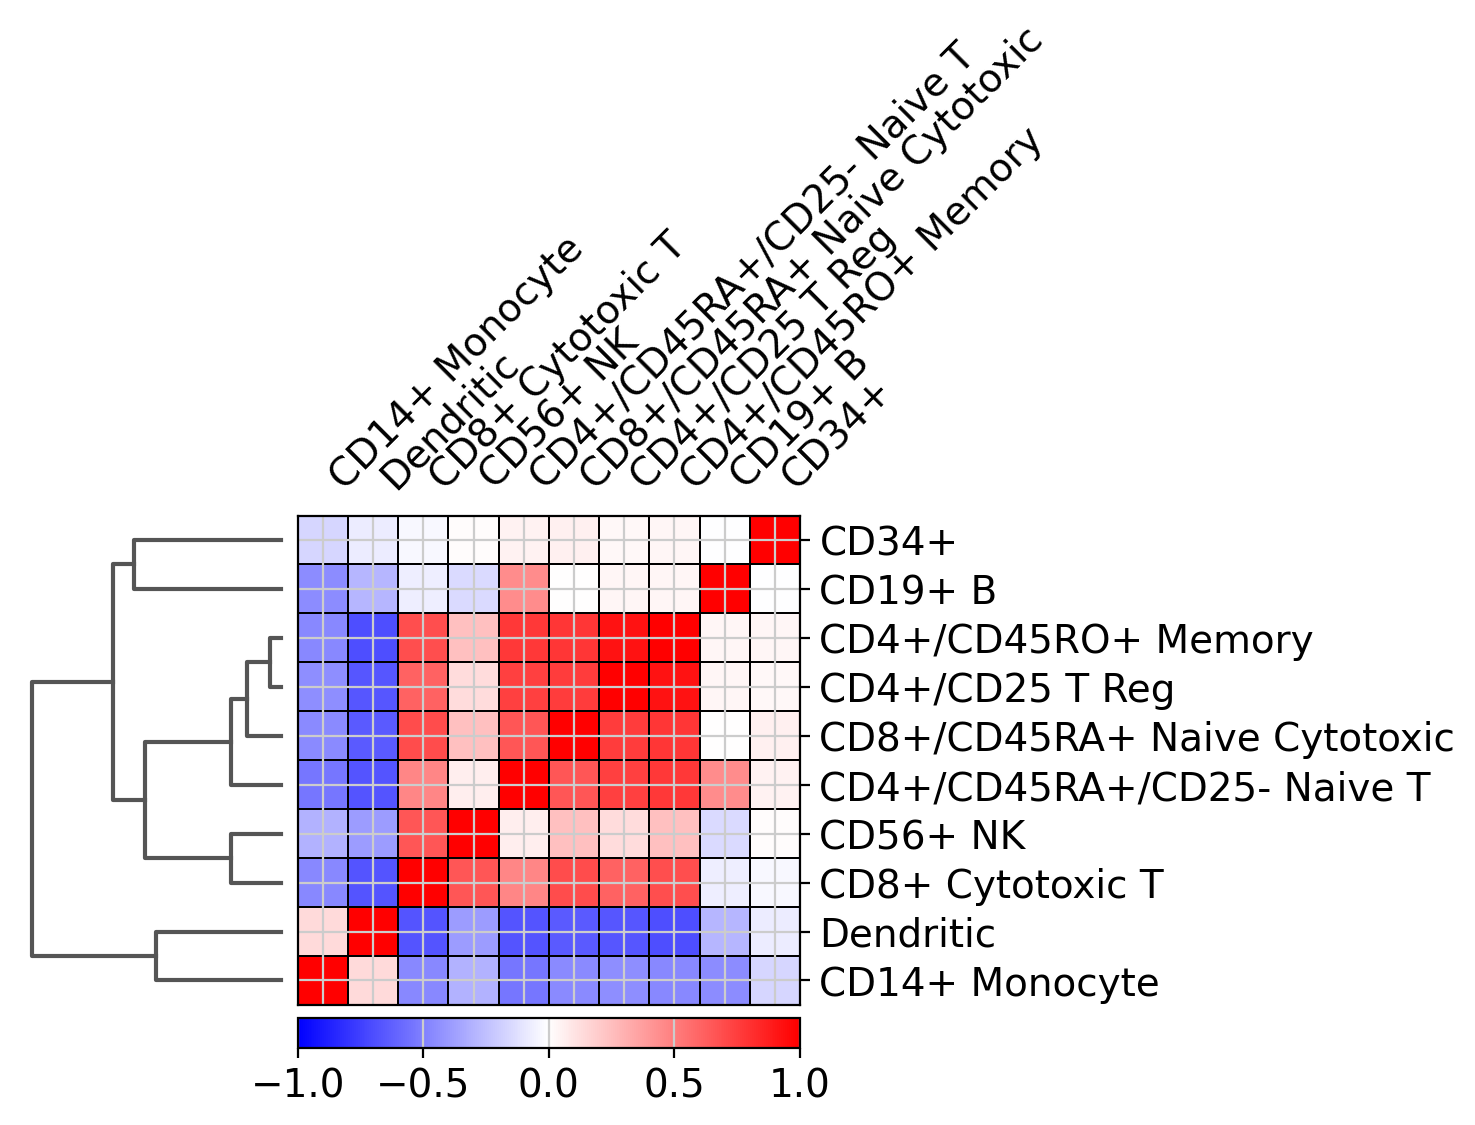

In [61]:
ax = sc.pl.correlation_matrix(pbmc, 'bulk_labels', figsize=(5,3.5))